In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from glob import glob
import numpy as np

In [2]:
def get_bin_eval(dfx,col,eval_method='rmse'):
    g=dfx.groupby(
            by=[
                'Dataset',
                'Eval_Method',
                'Sampling',
               ])
    bin_err=0
    metric=0
    eq=0
    first=True
    for gname,group in g:
        if first:
            first=False
            prev=group[col]['mean'].mean()
        else:
            first=True
            if prev<group[col]['mean'].mean() and eval_method=='r2':
                bin_err+=1
            elif prev>group[col]['mean'].mean() and eval_method=='rmse':
                bin_err+=1
            elif prev==group[col]['mean'].mean():
                eq+=1
            else:
                metric+=1
    print(f'PDF:{bin_err},Random:{metric}, Equal:{eq}')
    return bin_err,  metric, eq

In [3]:
def get_eval(dfx):
    g=dfx[['Selector', 'Ratio','Dataset', 'Eval_Method', 'PDF_Test', 'Sampling']].groupby(
            by=[
                'Dataset',
                'Sampling',
                'Eval_Method',
               ])
    bin_err=0
    metric=0
    eq=0
    first=True
    check=[]
    c=0
    out={1:0,2:0,3:0,4:0}
    for gname,group in g:
        print(gname, group.Selector.mean())
        check.append(group.Selector.mean())
        if len(check):
            if len(check)%4==0:
                out[np.argmin(check)+1]+=1
                check=[]
        
    print(f'PDF-Bin_Err:{out[1]},PDF-Metric:{out[2]},Random-Bin_Err:{out[3]},Random-Metric:{out[4]}')
    return out

In [3]:
df11_0=pd.read_pickle('R2_0.pickle')
df11_10=pd.read_pickle('R2_10.pickle')
df11_100=pd.read_pickle('R2_100.pickle')
df11_1k=pd.read_pickle('R2_1k.pickle')
df10_0=pd.read_pickle('RMSE_0.pickle')
df10_10=pd.read_pickle('RMSE_10.pickle')
df10_100=pd.read_pickle('RMSE_100.pickle')
df10_1k=pd.read_pickle('RMSE_1k.pickle')

In [4]:
df11_0.shape, df11_10.shape, df11_100.shape, df11_1k.shape, df10_100.shape, df10_10.shape, df10_1k.shape, df10_0.shape

((252, 21),
 (252, 21),
 (252, 21),
 (252, 21),
 (252, 21),
 (252, 21),
 (252, 21),
 (252, 21))

In [9]:
df11_1k.groupby(['Eval_Method', 'Flag', 'Sampling']).mean()

,,,Seed,Stack,Bins,Ratio,SML_Vanilla,R2_1000,Diff,Diff_Perc,Test_Eval,Train_Model,Train_Group_Mean,Train_Group_Sum,KL
Eval_Method,Flag,Sampling,,,,,,,,,,,,,
Metric,True,Random,185.0,3.0,1000.0,0.3,0.779481,0.843424,0.063943,14.046018,0.845552,4.631989,5.609311,67.311730,8.434242e-01
PDF Energy,True,PDF,185.0,3.0,1000.0,0.3,0.779481,0.846794,0.067312,14.648705,0.000000,5.020123,4.977813,59.733752,-1.555432e+16


In [11]:
r2_0=df11_0[['R2_0', 'Ratio','Bins','Dataset', 'Eval_Method','Sampling','KL']].groupby(
        by=[
            'Dataset',
            'Sampling',
            'Eval_Method',
           ]).agg({'R2_0': ['mean', 'std']})
r2_10=df11_10[['R2_10', 'Ratio','Bins','Dataset', 'Eval_Method','Sampling','KL']].groupby(
        by=[
            'Dataset',
            'Sampling',
            'Eval_Method',
           ]).agg({'R2_10': ['mean', 'std']})
r2_100=df11_100[['R2_100', 'Ratio','Bins','Dataset', 'Eval_Method','Sampling','KL']].groupby(
        by=[
            'Dataset',
            'Sampling',
            'Eval_Method',
           ]).agg({'R2_100': ['mean', 'std']})
r2_1k=df11_1k[['R2_1000', 'Ratio','Bins','Dataset', 'Eval_Method','Sampling','KL']].groupby(
        by=[
            'Dataset',
            'Sampling',
            'Eval_Method',
           ]).agg({'R2_1000': ['mean', 'std']})


In [12]:
df10_100.Dataset.unique().shape

(14,)

In [13]:
df10_0.Dataset.unique()

array(['361072', '361073', '361078', '361080', '361081', '361082',
       '361083', '361085', '361086', '361087', '361088', '361089',
       '361090', '42570'], dtype=object)

## Table Stratum

In [14]:
!mkdir paper

mkdir: cannot create directory ‘paper’: File exists


In [15]:
bins=df10_0.groupby(['Dataset','Seed'])['Dataset','Bins'].agg({'Bins':'mean'})
df_bins=pd.DataFrame(bins.Bins.astype(int))
df_bins.columns=['Stratum']
df_bins.to_pickle('paper/tbl_stratum_optimal_stratified.pkl')


/tmp/ipykernel_729041/1491377064.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bins=df10_0.groupby(['Dataset','Seed'])['Dataset','Bins'].agg({'Bins':'mean'})


In [16]:
with open("paper/tbl_stratum_optimal_stratified.pkl.tex", 'w') as wf:
    wf.write(df_bins.to_latex())

/tmp/ipykernel_729041/3985421369.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  wf.write(df_bins.to_latex())


In [17]:
def get_agg_std(df, sel='RMSE_100',):
    df=df[[sel, 'Bins','Ratio','Dataset', 'Eval_Method','Sampling','KL']].groupby(
        by=[
            'Dataset',
            'Sampling',
            'Eval_Method',
            'Ratio',
           ]).agg({'sel': ['mean', 'std']})
    return df

In [122]:
def get_agg(df, sel='RMSE_100',):
    df_mean=df[[sel, 'Bins','Ratio','Dataset', 'Eval_Method','Sampling','KL']].groupby(
        by=[
            'Dataset',
            'Sampling',
            'Eval_Method',
            'Ratio',
           ]).agg('mean')#'{sel: ['mean', 'std']})
    
    df_std=df[[sel, 'Bins','Ratio','Dataset', 'Eval_Method','Sampling','KL']].groupby(
        by=[
            'Dataset',
            'Sampling',
            'Eval_Method',
            'Ratio',
           ]).agg('std')
    
    return df_mean, df_std
    

In [139]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import ticker
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (10,7)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10, forward=True)
fig.set_dpi(100)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

<Figure size 1000x1000 with 0 Axes>

In [151]:
def get_kl_pdf(df, col, ratio=None):
    df[df.KL<0]=np.nan
    dr=None
    if ratio is not None:
        df=df[(df.Sampling=='PDF') & (df.Ratio==ratio)]
        
    else:
        df=df[(df.Sampling=='PDF')]
        
    df.to_pickle(f'paper/df_KL_PDF_{col}_{ratio}.pkl')
    df.to_pickle(f'paper/df_KL_PDF_{col}_{ratio}.csv')
    
    _pdf=round(df[col].mean(),3)
    _pdf_std=round(df[col].std(),3)
    _kl=round(df.KL.mean(),3)
    _kl_std=round(df.KL.std(),3)
    
    dr_mean, dr_std =get_agg(df,col)
    
    dr_mean=dr_mean.reset_index()
    dr_std=dr_std.reset_index()

    dr_mean=dr_mean.groupby(['Dataset']).mean()
    dr_std=dr_std.groupby(['Dataset']).std()
    
    bins=int(dr_mean.Bins.mean())
    
    drr=dr_mean[[col,'KL']]
    drr_s=dr_std[[col,'KL']]
    
    drr.columns=['PDF','KL']
    drr_s.columns=['PDF','KL']

    drr.to_pickle('paper/'+f'{col}_{(ratio if ratio else 0)*100}.jpg'+'.pkl')
    drr.to_csv('paper/'+f'{col}_{(ratio if ratio else 0)*100}.jpg'+'.csv')
    ax=drr.plot(rot=75, style=['b*-','r-','g^-'], linewidth=2.0, )
    plt.fill_between(drr.index, drr['KL']-drr_std['KL'], drr['KL']+drr_std['KL'], alpha=0.2, label=None, color='red')
    plt.fill_between(drr.index, drr['PDF']-drr_s['PDF'], drr['PDF']+drr_s['PDF'], alpha=0.2, label=None, color='blue')


    PDF='{PDF}'
    KL='{KL}'
    OB='{'
    CB='}'
    if bins>9:
        _title=f'$\\beta={bins},\ \\overline{PDF}={_pdf}\pm{_pdf_std},\  \\overline{KL}={_kl}\pm{_kl_std}$'
        
    else:
        BETA='{\\beta}'
        _title=f'$\\overline{BETA}={bins}\  \ \\overline{PDF}={_pdf}\pm{_pdf_std},\  \\overline{KL}={_kl}\pm{_kl_std}$'
    if ratio:
        _title=f'$\\rho={ratio}$, '+_title
    ax.set_title(_title, fontsize=20)
    plt.xlabel('Dataset', fontsize=20)
    plt.ylabel('R2', fontsize=20)
    ax.xaxis.set_minor_locator(ticker.LinearLocator(14))
    ax.xaxis.set_major_locator(ticker.LinearLocator(14))
    ax.set_xticklabels(drr.index)
    plt.legend(fontsize=20)
    plt.grid(visible=True, which='major', color='0.65', linestyle='-')
    if ratio is None:
        ratio=0
    plt.savefig(f'{col}_{ratio*100}_v2.jpg')
    plt.show()
    return plt,df, drr, drr_std

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


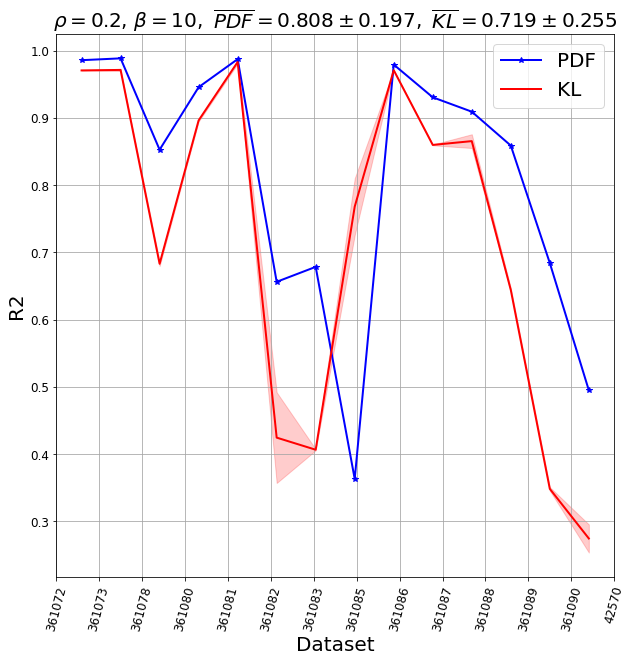

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


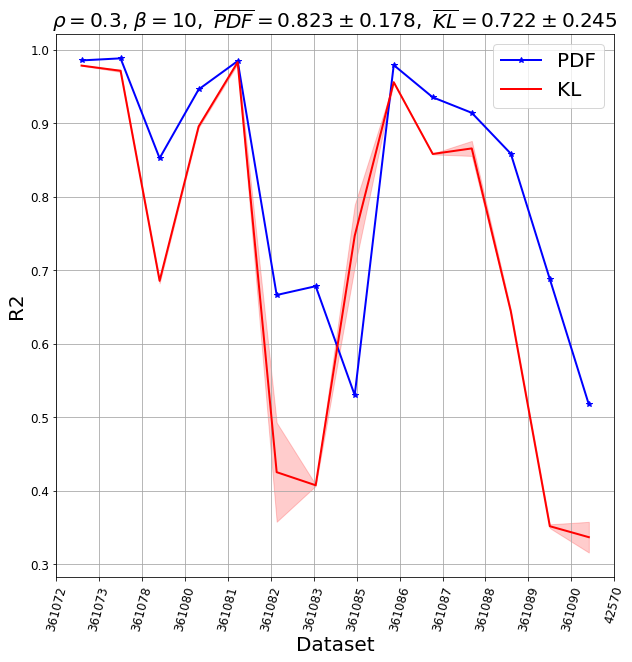

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


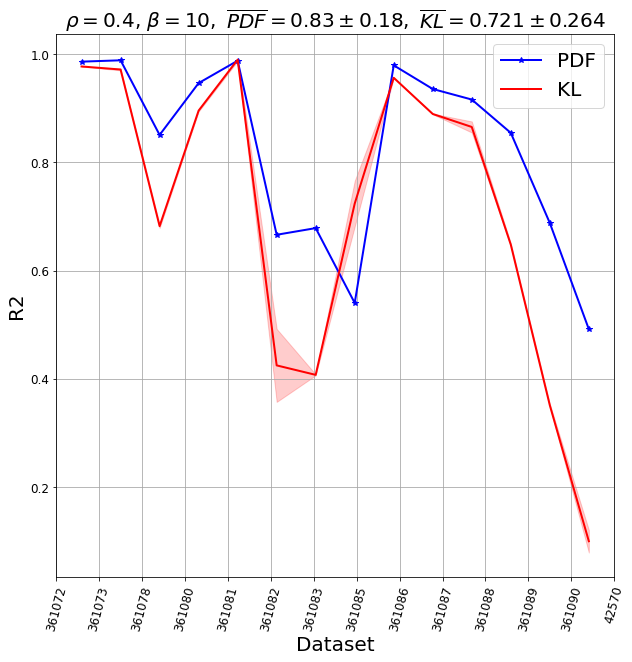

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


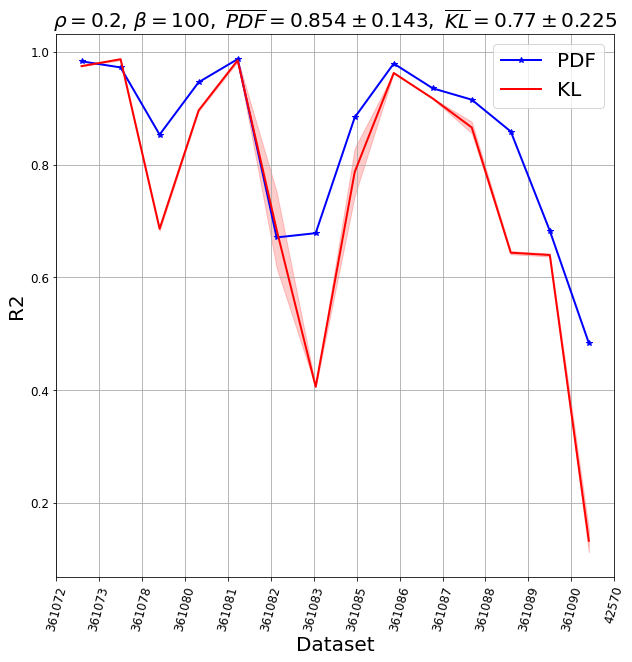

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


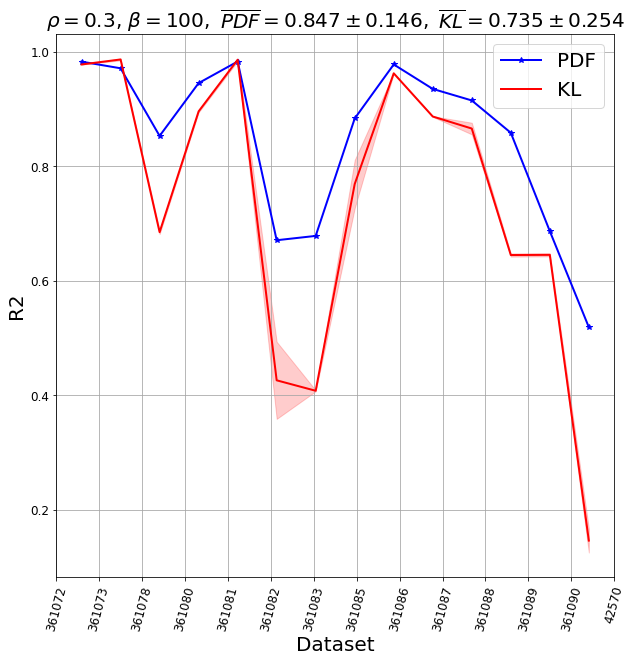

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


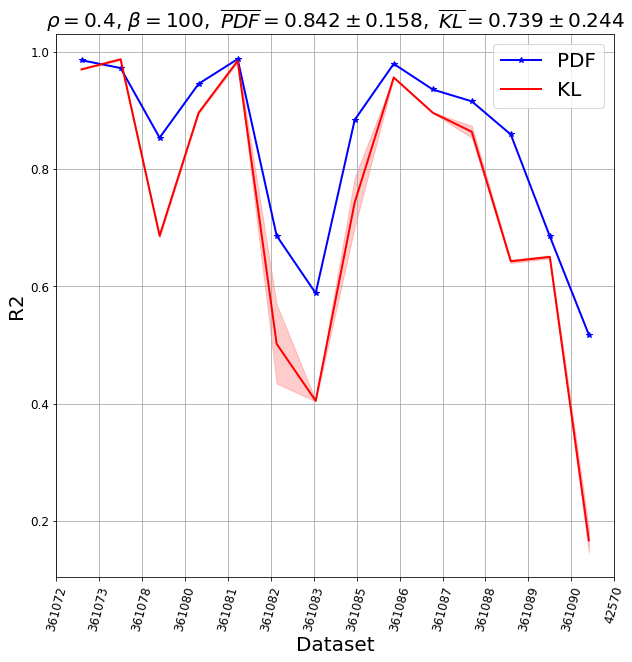

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


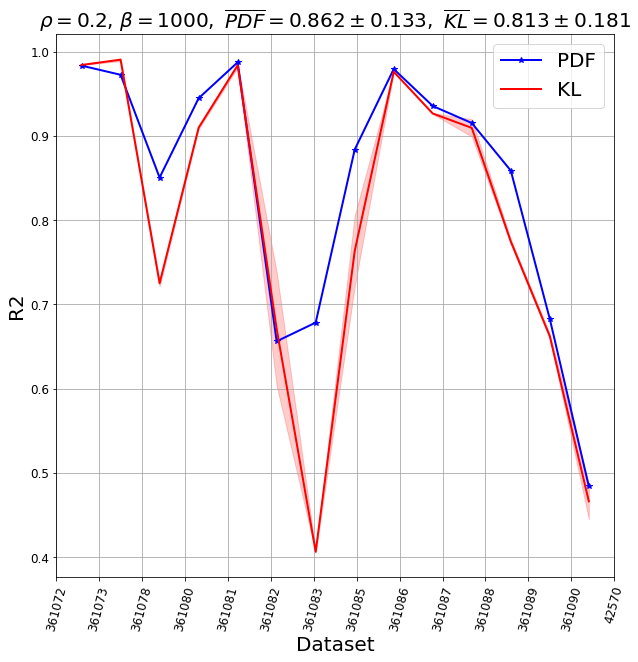

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


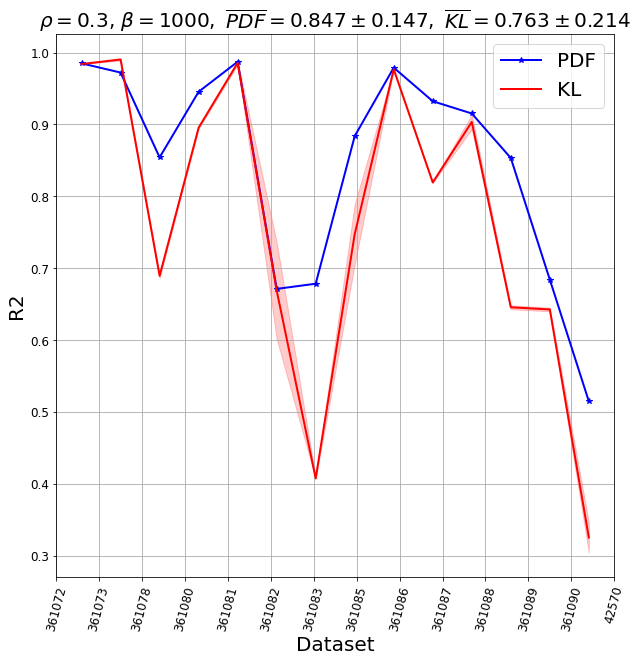

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


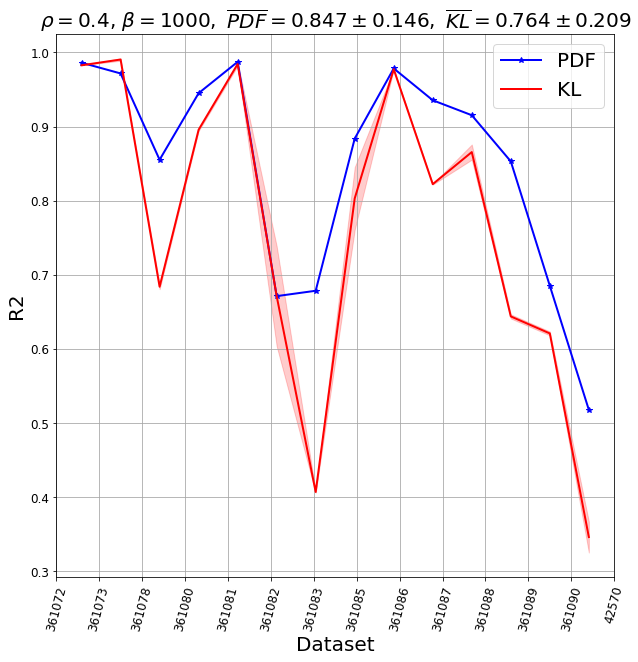

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


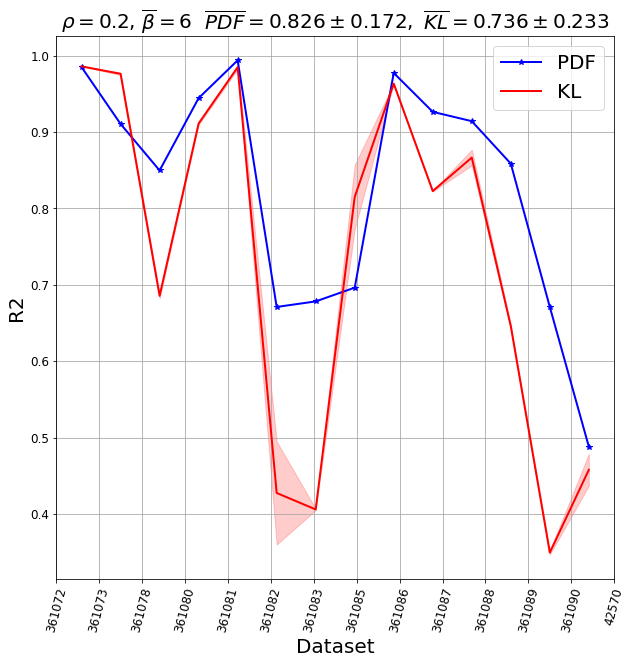

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


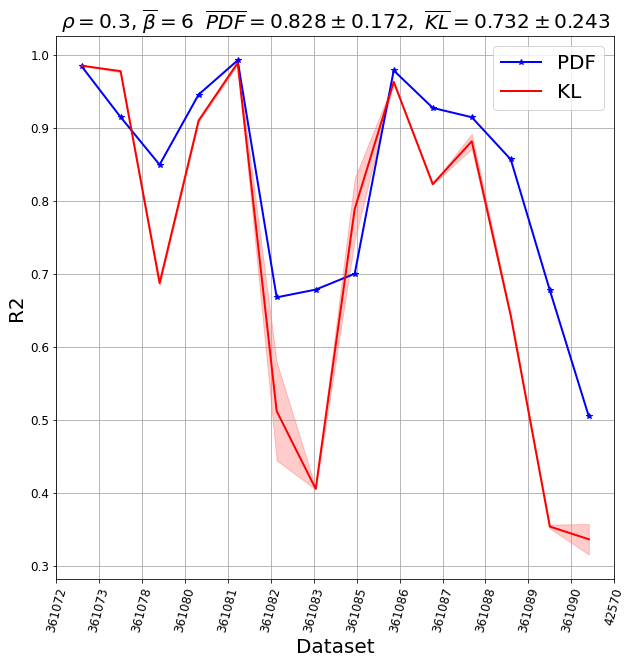

/tmp/ipykernel_729041/609560072.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drr.index)


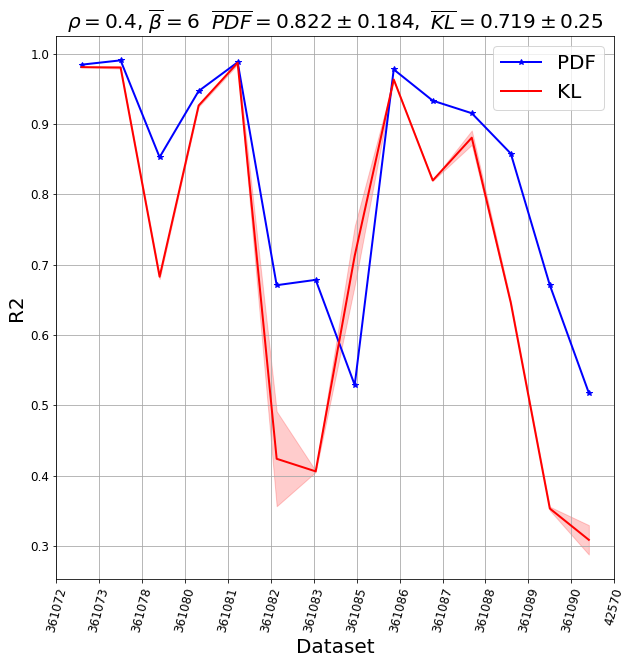

In [154]:
for exp in [
            (df11_10,'R2_10'),
            (df11_100,'R2_100'),
            (df11_1k,'R2_1000'),
            (df11_0,'R2_0')
           ]:
    for ratio in [.2,.3,.4]:
        a,b, drr, drr_std = get_kl_pdf(exp[0], exp[1], ratio=ratio)

In [142]:
drr_std

,PDF,KL
Dataset,,
361072,0.000832,0.000097
361073,0.077607,0.001583
361078,0.004505,0.003338
361080,0.000281,0.001705
361081,0.004052,0.002421
361082,0.004192,0.067439
361083,0.000000,0.000862
361085,0.016288,0.042169
361086,0.000269,0.000119


In [853]:
rmse_0=df10_0[['RMSE_0', 'Bins','Ratio','Dataset', 'Eval_Method','Sampling','KL']].groupby(
        by=[
            'Dataset',
            'Sampling',
            'Eval_Method',
            
           ]).agg({'RMSE_0': ['mean', 'std']})
rmse_10=df10_10[['RMSE_10', 'Bins','Ratio','Dataset', 'Eval_Method','Sampling','KL']].groupby(
        by=[
            'Dataset',
            'Sampling',
            'Eval_Method',
           ]).agg({'RMSE_10': ['mean', 'std']})
rmse_100=df10_100[['RMSE_100', 'Bins','Ratio','Dataset', 'Eval_Method','Sampling','KL']].groupby(
        by=[
            'Dataset',
            'Sampling',
            'Eval_Method',
           ]).agg({'RMSE_100': ['mean', 'std']})

rmse_1k=df10_1k[['RMSE_1000', 'Bins','Ratio','Dataset', 'Eval_Method','Sampling','KL']].groupby(
        by=[
            'Dataset',
            'Sampling',
            'Eval_Method',
           ]).agg({'RMSE_1000': ['mean', 'std']})

In [854]:
dx=rmse_0.join(r2_0).join(r2_10).join(rmse_10).join(r2_100).join(rmse_100).join(rmse_1k).join(r2_1k)
dx_bk=dx

In [855]:
out={'RMSE':{'mean':{},
             'std':{}},
     'R2':{'mean':{},
             'std':{}}
    }
for metric in out.keys():
    for t in out[metric].keys():
        for i in dx.index:
            if 'Random' in i:
                for j in dx.loc[i].index:
                    if metric in j[0] and t in j[1]:
                        out[metric][t][i[0]]=out[metric][t].get(i[0],0)+dx.loc[i,j]/4      
                        
dx.loc[('361072', 'Random',     'Metric')][(   'RMSE_0', 'mean')]=0

for metric in out:
    for t in out[metric]:
        for i in dx.index:
            for j in dx.loc[i].index:
                if metric in j[0] and t==j[1] and i[1]=='Random':
                    #print(i,j,out[metric][t][i[0]])
                    dx.loc[i][j]=out[metric][t][i[0]]

In [856]:
dx.to_pickle('paper/dx_rmse_r2_pdf_vs_sampling.pkl')
dx.to_csv('paper/dx_rmse_r2_pdf_vs_sampling.csv')

In [857]:
def join_mean_std(dx, del_org=True):
    dx['_R2_10']=dx.apply(lambda x: ('$'+str(round(x['R2_10']['mean'],4))+
                                  ' \pm '+
                                  str(round(x['R2_10']['std'],3))+'$'),
                       axis=1)
    dx['_RMSE_10']=dx.apply(lambda x: '$'+(str(round(x['RMSE_10']['mean'],4))+
                                   ' \pm '+
                                   str(round(x['RMSE_10']['std'],3))+'$'), 
                         axis=1)
    dx['_R2_100']=dx.apply(lambda x: ('$'+str(round(x['R2_100']['mean'],4))+
                                  ' \pm '+
                                  str(round(x['R2_100']['std'],3))+'$'),
                       axis=1)
    dx['_RMSE_100']=dx.apply(lambda x: '$'+(str(round(x['RMSE_100']['mean'],4))+
                                   ' \pm '+
                                   str(round(x['RMSE_100']['std'],3))+'$'), 
                         axis=1)
    dx['_R2_1000']=dx.apply(lambda x: ('$'+str(round(x['R2_1000']['mean'],4))+
                                  ' \pm '+
                                  str(round(x['R2_1000']['std'],3))+'$'),
                       axis=1)

    dx['_RMSE_1000']=dx.apply(lambda x: '$'+(str(round(x['RMSE_1000']['mean'],4))+
                                   ' \pm '+
                                   str(round(x['RMSE_1000']['std'],3))+'$'), 
                         axis=1)
    dx['_R2_0']=dx.apply(lambda x: '$'+(str(round(x['R2_0']['mean'],4))+
                                   ' \pm '+
                                   str(round(x['R2_0']['std'],3))+'$'), 
                         axis=1)
    dx['_RMSE_0']=dx.apply(lambda x: '$'+(str(round(x['RMSE_0']['mean'],4))+
                                   ' \pm '+
                                   str(round(x['RMSE_0']['std'],3))+'$'), 
                         axis=1)
    if del_org:
        dx=del_non_paper(dx)
    return dx


In [858]:
dx=join_mean_std(dx,False)

In [859]:
dx

RMSE_0                R2_0            \
                                    mean       std      mean       std   
Dataset Sampling Eval_Method                                             
361072  PDF      PDF Energy     2.285418  0.100470  0.984469  0.002246   
        Random   Metric         2.255033  0.054383  0.984932  0.001562   
361073  PDF      PDF Energy     7.787946  7.280729  0.938506  0.102860   
        Random   Metric         4.500983  0.427056  0.988351  0.002250   
361078  PDF      PDF Energy     0.220044  0.006596  0.850595  0.007950   
        Random   Metric         0.219382  0.006101  0.851484  0.007593   
361080  PDF      PDF Energy     0.236615  0.002581  0.945512  0.001174   
        Random   Metric         0.245571  0.007037  0.941395  0.003407   
361081  PDF      PDF Energy     0.068299  0.032262  0.991214  0.007269   
        Random   Metric         0.080185  0.042063  0.987352  0.011227   
361082  PDF      PDF Energy   104.037535  3.800579  0.669927  0.021896   
        Random   Metric       107.276317  3.316033  0.648812  0.024293   
361083  PDF      PDF Energy     0.338191  0.001142  0.678404  0.001914   
        Random   Metric         0.338191  0.001142  0.678404  0.001914   
361085  PDF      PDF Energy     0.031774  0.018239  0.641823  0.306866   
        Random   Metric         0.020685  0.005476  0.865283  0.047684   
361086  PDF      PDF Energy     0.084504  0.002723  0.977709  0.001351   
        Random   Metric         0.085796  0.002569  0.977018  0.001366   
361087  PDF      PDF Energy     0.152191  0.005796  0.928885  0.005403   
        Random   Metric         0.145906  0.002920  0.934689  0.002550   
361088  PDF      PDF Energy    10.045855  0.458113  0.914604  0.008210   
        Random   Metric        10.163004  0.587097  0.912474  0.010639   
361089  PDF      PDF Energy     0.133728  0.002153  0.857686  0.003428   
        Random   Metric         0.134125  0.003105  0.856776  0.006424   
361090  PDF      PDF Energy     0.774765  0.010520  0.673214  0.009003   
        Random   Metric         0.781211  0.024629  0.667505  0.021057   
42570   PDF      PDF Energy     9.262296  0.451748  0.503583  0.027106   
        Random   Metric         9.290604  0.545377  0.490130  0.023668   

                                 R2_10               RMSE_10            \
                                  mean       std        mean       std   
Dataset Sampling Eval_Method                                             
361072  PDF      PDF Energy   0.985745  0.001963    2.190370  0.074086   
        Random   Metric       0.984932  0.001562    2.255033  0.054383   
361073  PDF      PDF Energy   0.988413  0.001283    4.501045  0.248430   
        Random   Metric       0.988351  0.002250    4.500983  0.427056   
361078  PDF      PDF Energy   0.851884  0.005652    0.219117  0.004809   
        Random   Metric       0.851484  0.007593    0.219382  0.006101   
361080  PDF      PDF Energy   0.946005  0.000959    0.235549  0.002595   
        Random   Metric       0.941395  0.003407    0.245571  0.007037   
361081  PDF      PDF Energy   0.986533  0.010035    0.084016  0.041159   
        Random   Metric       0.987352  0.011227    0.080185  0.042063   
361082  PDF      PDF Energy   0.662916  0.020850  105.133282  3.342916   
        Random   Metric       0.648812  0.024293  107.276317  3.316033   
361083  PDF      PDF Energy   0.678404  0.001914    0.338191  0.001142   
        Random   Metric       0.678404  0.001914    0.338191  0.001142   
361085  PDF      PDF Energy   0.477815  0.229302    0.039400  0.012013   
        Random   Metric       0.865283  0.047684    0.020685  0.005476   
361086  PDF      PDF Energy   0.979168  0.000376    0.081717  0.000592   
        Random   Metric       0.977018  0.001366    0.085796  0.002569   
361087  PDF      PDF Energy   0.933776  0.005480    0.146841  0.005367   
        Random   Metric       0.934689  0.002550    0.145906  0.002920   
361088  PDF      PDF Energy   0.91312

In [860]:
def make_bold(dx, cols,metric):
    for col in cols:
        #print(col,dx.columns[col])
        first=True
        for i in dx.index:
            if first:
                prev=i
                first=False
                continue
            #print(i,dx.loc[i,dx.columns[col]],prev,dx.loc[prev,dx.columns[col]])
            if dx.loc[i,dx.columns[col]]==dx.loc[prev,dx.columns[col]]:
                dx.loc[i, ('_'+dx.columns[col][0],'')]='\pmb{'+dx.loc[i,('_'+dx.columns[col][0],'')]+'}'
                dx.loc[prev, ('_'+dx.columns[col][0],'')]='\pmb{'+dx.loc[prev,('_'+dx.columns[col][0],'')]+'}'
            elif ((dx.loc[i,dx.columns[col]]<dx.loc[prev,dx.columns[col]] and metric=='rmse') or 
                  (dx.loc[i,dx.columns[col]]>dx.loc[prev,dx.columns[col]] and metric=='r2')):
                dx.loc[i, ('_'+dx.columns[col][0],'')]='\pmb{'+dx.loc[i,('_'+dx.columns[col][0],'')]+'}'
            else:# dx.loc[i,dx.columns[col]]>dx.loc[prev,dx.columns[col]] and metric=='rmse':
                dx.loc[prev, ('_'+dx.columns[col][0],'')]='\pmb{'+dx.loc[prev,('_'+dx.columns[col][0],'')]+'}'
            
            first=True
    return dx
dx=dx.round(4)
dx1=make_bold(dx.copy(),rmse_col,'rmse')
dx2=make_bold(dx1,r2_col,'r2')
dx2

RMSE_0            R2_0           R2_10  \
                                  mean     std    mean     std    mean   
Dataset Sampling Eval_Method                                             
361072  PDF      PDF Energy     2.2854  0.1005  0.9845  0.0022  0.9857   
        Random   Metric         2.2550  0.0544  0.9849  0.0016  0.9849   
361073  PDF      PDF Energy     7.7879  7.2807  0.9385  0.1029  0.9884   
        Random   Metric         4.5010  0.4271  0.9884  0.0023  0.9884   
361078  PDF      PDF Energy     0.2200  0.0066  0.8506  0.0080  0.8519   
        Random   Metric         0.2194  0.0061  0.8515  0.0076  0.8515   
361080  PDF      PDF Energy     0.2366  0.0026  0.9455  0.0012  0.9460   
        Random   Metric         0.2456  0.0070  0.9414  0.0034  0.9414   
361081  PDF      PDF Energy     0.0683  0.0323  0.9912  0.0073  0.9865   
        Random   Metric         0.0802  0.0421  0.9874  0.0112  0.9874   
361082  PDF      PDF Energy   104.0375  3.8006  0.6699  0.0219  0.6629   
        Random   Metric       107.2763  3.3160  0.6488  0.0243  0.6488   
361083  PDF      PDF Energy     0.3382  0.0011  0.6784  0.0019  0.6784   
        Random   Metric         0.3382  0.0011  0.6784  0.0019  0.6784   
361085  PDF      PDF Energy     0.0318  0.0182  0.6418  0.3069  0.4778   
        Random   Metric         0.0207  0.0055  0.8653  0.0477  0.8653   
361086  PDF      PDF Energy     0.0845  0.0027  0.9777  0.0014  0.9792   
        Random   Metric         0.0858  0.0026  0.9770  0.0014  0.9770   
361087  PDF      PDF Energy     0.1522  0.0058  0.9289  0.0054  0.9338   
        Random   Metric         0.1459  0.0029  0.9347  0.0026  0.9347   
361088  PDF      PDF Energy    10.0459  0.4581  0.9146  0.0082  0.9131   
        Random   Metric        10.1630  0.5871  0.9125  0.0106  0.9125   
361089  PDF      PDF Energy     0.1337  0.0022  0.8577  0.0034  0.8573   
        Random   Metric         0.1341  0.0031  0.8568  0.0064  0.8568   
361090  PDF      PDF Energy     0.7748  0.0105  0.6732  0.0090  0.6867   
        Random   Metric         0.7812  0.0246  0.6675  0.0211  0.6675   
42570   PDF      PDF Energy     9.2623  0.4517  0.5036  0.0271  0.4892   
        Random   Metric         9.2906  0.5454  0.4901  0.0237  0.4901   

                                       RMSE_10          R2_100          \
                                 std      mean     std    mean     std   
Dataset Sampling Eval_Method                                             
361072  PDF      PDF Energy   0.0020    2.1904  0.0741  0.9839  0.0031   
        Random   Metric       0.0016    2.2550  0.0544  0.9849  0.0016   
361073  PDF      PDF Energy   0.0013    4.5010  0.2484  0.9720  0.0020   
        Random   Metric       0.0023    4.5010  0.4271  0.9884  0.0023   
361078  PDF      PDF Energy   0.0057    0.2191  0.0048  0.8532  0.0059   
        Random   Metric       0.0076    0.2194  0.0061  0.8515  0.0076   
361080  PDF      PDF Energy   0.0010    0.2355  0.0026  0.9457  0.0019   
        Random   Metric       0.0034    0.2456  0.0070  0.9414  0.0034   
361081  PDF      PDF Energy   0.0100    0.0840  0.0412  0.9859  0.0119   
        Random   Metric       0.0112    0.0802  0.0421  0.9874  0.0112   
361082  PDF      PDF Energy   0.0208  105.1333  3.3429  0.6759  0.0224   
        Random   Metric       0.0243  107.2763  3.3160  0.6488  0.0243   
361083  PDF      PDF Energy   0.0019    0.3382  0.0011  0.6483  0.0903   
        Random   Metric       0.0019    0.3382  0.0011  0.6784  0.0019   
361085  PDF      PDF Energy   0.2293    0.0394  0.0120  0.8837  0.0345   
        Random   Metric       0.0477    0.0207  0.0055  0.8653  0.0477   
361086  PDF      PDF Energy   0.0004    0.0817  0.0006  0.9789  0.0011   
        Random   Metric       0.0014    0.0858  0.0026  0.9770  0.0014   
361087  PDF      PDF Energy   0.0055    0.1468  0.0054  0.9354  0.0017   
        Random   Metric       0.0026    0.1459  0.0029  0.9347  0.0026   
361088  PDF      PDF Energy   0.011

In [861]:
def get_latex(df):
    return str(df.to_latex().replace('\$','$').replace('\\textbackslash ','\\').replace('\{','{').replace('\}','}'))

In [862]:
def del_non_paper(dx):
    del dx['R2_0']
    del dx['R2_10']
    del dx['R2_100']
    del dx['R2_1000']
    del dx['RMSE_0']
    del dx['RMSE_10']
    del dx['RMSE_100']
    del dx['RMSE_1000']
    return dx

In [863]:
del_non_paper(dx2)

_R2_10  \
                                                         
Dataset Sampling Eval_Method                             
361072  PDF      PDF Energy   \pmb{$0.9857 \pm 0.002$}   
        Random   Metric             $0.9849 \pm 0.002$   
361073  PDF      PDF Energy   \pmb{$0.9884 \pm 0.001$}   
        Random   Metric       \pmb{$0.9884 \pm 0.002$}   
361078  PDF      PDF Energy   \pmb{$0.8519 \pm 0.006$}   
        Random   Metric             $0.8515 \pm 0.008$   
361080  PDF      PDF Energy    \pmb{$0.946 \pm 0.001$}   
        Random   Metric             $0.9414 \pm 0.003$   
361081  PDF      PDF Energy          $0.9865 \pm 0.01$   
        Random   Metric       \pmb{$0.9874 \pm 0.011$}   
361082  PDF      PDF Energy   \pmb{$0.6629 \pm 0.021$}   
        Random   Metric             $0.6488 \pm 0.024$   
361083  PDF      PDF Energy   \pmb{$0.6784 \pm 0.002$}   
        Random   Metric       \pmb{$0.6784 \pm 0.002$}   
361085  PDF      PDF Energy         $0.4778 \pm 0.229$   
        Random   Metric       \pmb{$0.8653 \pm 0.048$}   
361086  PDF      PDF Energy     \pmb{$0.9792 \pm 0.0$}   
        Random   Metric              $0.977 \pm 0.001$   
361087  PDF      PDF Energy         $0.9338 \pm 0.005$   
        Random   Metric       \pmb{$0.9347 \pm 0.003$}   
361088  PDF      PDF Energy   \pmb{$0.9131 \pm 0.011$}   
        Random   Metric             $0.9125 \pm 0.011$   
361089  PDF      PDF Energy   \pmb{$0.8573 \pm 0.006$}   
        Random   Metric             $0.8568 \pm 0.006$   
361090  PDF      PDF Energy   \pmb{$0.6867 \pm 0.003$}   
        Random   Metric             $0.6675 \pm 0.021$   
42570   PDF      PDF Energy         $0.4892 \pm 0.028$   
        Random   Metric       \pmb{$0.4901 \pm 0.024$}   

                                                _RMSE_10  \
                                                           
Dataset Sampling Eval_Method                               
361072  PDF      PDF Energy     \pmb{$2.1904 \pm 0.074$}   
        Random   Metric                $2.255 \pm 0.054$   
361073  PDF      PDF Energy      \pmb{$4.501 \pm 0.248$}   
        Random   Metric          \pmb{$4.501 \pm 0.427$}   
361078  PDF      PDF Energy     \pmb{$0.2191 \pm 0.005$}   
        Random   Metric               $0.2194 \pm 0.006$   
361080  PDF      PDF Energy     \pmb{$0.2355 \pm 0.003$}   
        Random   Metric               $0.2456 \pm 0.007$   
361081  PDF      PDF Energy            $0.084 \pm 0.041$   
        Random   Metric         \pmb{$0.0802 \pm 0.042$}   
361082  PDF      PDF Energy   \pmb{$105.1333 \pm 3.343$}   
        Random   Metric             $107.2763 \pm 3.316$   
361083  PDF      PDF Energy     \pmb{$0.3382 \pm 0.001$}   
        Random   Metric         \pmb{$0.3382 \pm 0.001$}   
361085  PDF      PDF Energy           $0.0394 \pm 0.012$   
        Random   Metric         \pmb{$0.0207 \pm 0.005$}   
361086  PDF      PDF Energy     \pmb{$0.0817 \pm 0.001$}   
        Random   Metric               $0.0858 \pm 0.003$   
361087  PDF      PDF Energy           $0.1468 \pm 0.005$   
        Random   Metric         \pmb{$0.1459 \pm 0.003$}   
361088  PDF      PDF Energy    \pmb{$10.1257 \pm 0.619$}   
        Random   Metric               $10.163 \pm 0.587$   
361089  PDF      PDF Energy     \pmb{$0.1339 \pm 0.003$}   
        Random   Metric               $0.1341 \pm 0.003$   
361090  PDF      PDF Energy     \pmb{$0.7587 \pm 0.004$}   
        Random   Metric               $0.7812 \pm 0.025$   
42570   PDF      PDF Energy      \pmb{$9.2177 \pm 0.62$}   
        Random   Metric               $9.2906 \pm 0.545$   

                                               _R2_100  \
                                                         
Dataset Sampling Eval_Method                             
361072  PDF      PDF Energy         $0.9839 \pm 0.003$   
        Random   Metric       \pmb{$0.9849 \pm 0.002$}   
361073  PDF      PDF Energy          $0.972 \pm 0.002$   
        Random   Metric       \pmb{$0.98

In [864]:
def get_tex_dx(dx):
    return str(dx.to_latex().replace('\$',
                             '$').replace('\\textbackslash ',
                                          '\\').replace('\{',
                                                        '{').replace('\}',
                                                                     '}').replace('3610',
                                                                                  '\hline 3610'))

In [865]:
with open('paper/dx_rmse_r2_pdf_vs_sampling.tex','w') as f:
    f.write(get_tex_dx(dx2))

/tmp/ipykernel_140334/2852109057.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return str(dx.to_latex().replace('\$',


In [866]:
print(get_tex_dx(dx2))

\begin{tabular}{lllllllllll}
\toprule
      &        &        &                    \_R2\_10 &                    \_RMSE\_10 &                   \_R2\_100 &                   \_RMSE\_100 &                  \_R2\_1000 &                  \_RMSE\_1000 &                     \_R2\_0 &                     \_RMSE\_0 \\
      &        &        \\
Dataset & Sampling & Eval\_Method &                           &                             &                           &                             &                           &                             &                           &                             \\
\midrule
\hline 361072 & PDF & PDF Energy &  \pmb{$0.9857 \pm 0.002$} &    \pmb{$2.1904 \pm 0.074$} &        $0.9839 \pm 0.003$ &          $2.3204 \pm 0.136$ &        $0.9848 \pm 0.003$ &          $2.2556 \pm 0.133$ &        $0.9845 \pm 0.002$ &            $2.2854 \pm 0.1$ \\
      & Random & Metric &        $0.9849 \pm 0.002$ &           $2.255 \pm 0.054$ &  \pmb{$0.9849 \pm 0.002$} &   

/tmp/ipykernel_140334/2852109057.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return str(dx.to_latex().replace('\$',


In [867]:
dx

RMSE_0            R2_0           R2_10  \
                                  mean     std    mean     std    mean   
Dataset Sampling Eval_Method                                             
361072  PDF      PDF Energy     2.2854  0.1005  0.9845  0.0022  0.9857   
        Random   Metric         2.2550  0.0544  0.9849  0.0016  0.9849   
361073  PDF      PDF Energy     7.7879  7.2807  0.9385  0.1029  0.9884   
        Random   Metric         4.5010  0.4271  0.9884  0.0023  0.9884   
361078  PDF      PDF Energy     0.2200  0.0066  0.8506  0.0080  0.8519   
        Random   Metric         0.2194  0.0061  0.8515  0.0076  0.8515   
361080  PDF      PDF Energy     0.2366  0.0026  0.9455  0.0012  0.9460   
        Random   Metric         0.2456  0.0070  0.9414  0.0034  0.9414   
361081  PDF      PDF Energy     0.0683  0.0323  0.9912  0.0073  0.9865   
        Random   Metric         0.0802  0.0421  0.9874  0.0112  0.9874   
361082  PDF      PDF Energy   104.0375  3.8006  0.6699  0.0219  0.6629   
        Random   Metric       107.2763  3.3160  0.6488  0.0243  0.6488   
361083  PDF      PDF Energy     0.3382  0.0011  0.6784  0.0019  0.6784   
        Random   Metric         0.3382  0.0011  0.6784  0.0019  0.6784   
361085  PDF      PDF Energy     0.0318  0.0182  0.6418  0.3069  0.4778   
        Random   Metric         0.0207  0.0055  0.8653  0.0477  0.8653   
361086  PDF      PDF Energy     0.0845  0.0027  0.9777  0.0014  0.9792   
        Random   Metric         0.0858  0.0026  0.9770  0.0014  0.9770   
361087  PDF      PDF Energy     0.1522  0.0058  0.9289  0.0054  0.9338   
        Random   Metric         0.1459  0.0029  0.9347  0.0026  0.9347   
361088  PDF      PDF Energy    10.0459  0.4581  0.9146  0.0082  0.9131   
        Random   Metric        10.1630  0.5871  0.9125  0.0106  0.9125   
361089  PDF      PDF Energy     0.1337  0.0022  0.8577  0.0034  0.8573   
        Random   Metric         0.1341  0.0031  0.8568  0.0064  0.8568   
361090  PDF      PDF Energy     0.7748  0.0105  0.6732  0.0090  0.6867   
        Random   Metric         0.7812  0.0246  0.6675  0.0211  0.6675   
42570   PDF      PDF Energy     9.2623  0.4517  0.5036  0.0271  0.4892   
        Random   Metric         9.2906  0.5454  0.4901  0.0237  0.4901   

                                       RMSE_10          R2_100          \
                                 std      mean     std    mean     std   
Dataset Sampling Eval_Method                                             
361072  PDF      PDF Energy   0.0020    2.1904  0.0741  0.9839  0.0031   
        Random   Metric       0.0016    2.2550  0.0544  0.9849  0.0016   
361073  PDF      PDF Energy   0.0013    4.5010  0.2484  0.9720  0.0020   
        Random   Metric       0.0023    4.5010  0.4271  0.9884  0.0023   
361078  PDF      PDF Energy   0.0057    0.2191  0.0048  0.8532  0.0059   
        Random   Metric       0.0076    0.2194  0.0061  0.8515  0.0076   
361080  PDF      PDF Energy   0.0010    0.2355  0.0026  0.9457  0.0019   
        Random   Metric       0.0034    0.2456  0.0070  0.9414  0.0034   
361081  PDF      PDF Energy   0.0100    0.0840  0.0412  0.9859  0.0119   
        Random   Metric       0.0112    0.0802  0.0421  0.9874  0.0112   
361082  PDF      PDF Energy   0.0208  105.1333  3.3429  0.6759  0.0224   
        Random   Metric       0.0243  107.2763  3.3160  0.6488  0.0243   
361083  PDF      PDF Energy   0.0019    0.3382  0.0011  0.6483  0.0903   
        Random   Metric       0.0019    0.3382  0.0011  0.6784  0.0019   
361085  PDF      PDF Energy   0.2293    0.0394  0.0120  0.8837  0.0345   
        Random   Metric       0.0477    0.0207  0.0055  0.8653  0.0477   
361086  PDF      PDF Energy   0.0004    0.0817  0.0006  0.9789  0.0011   
        Random   Metric       0.0014    0.0858  0.0026  0.9770  0.0014   
361087  PDF      PDF Energy   0.0055    0.1468  0.0054  0.9354  0.0017   
        Random   Metric       0.0026    0.1459  0.0029  0.9347  0.0026   
361088  PDF      PDF Energy   0.011

In [868]:
get_bin_eval(dx,'R2_10','r2'), get_bin_eval(dx,'RMSE_10','rmse')

PDF:8,Random:4, Equal:2
PDF:9,Random:3, Equal:2


((8, 4, 2), (9, 3, 2))

In [869]:
get_bin_eval(dx,'R2_100','r2'), get_bin_eval(dx,'RMSE_100','rmse')

PDF:10,Random:4, Equal:0
PDF:10,Random:4, Equal:0


((10, 4, 0), (10, 4, 0))

In [870]:
get_bin_eval(dx,'R2_1000','r2'), get_bin_eval(dx,'RMSE_1000','rmse')

PDF:8,Random:5, Equal:1
PDF:8,Random:5, Equal:1


((8, 5, 1), (8, 5, 1))

In [871]:
get_bin_eval(dx,'R2_0','r2'), get_bin_eval(dx,'RMSE_0','rmse')

PDF:8,Random:5, Equal:1
PDF:8,Random:5, Equal:1


((8, 5, 1), (8, 5, 1))

In [872]:
for col in ['RMSE_0','RMSE_10','RMSE_100','RMSE_1000']:
    print(col, get_bin_eval(dx,col,'rmse'))

PDF:8,Random:5, Equal:1
RMSE_0 (8, 5, 1)
PDF:9,Random:3, Equal:2
RMSE_10 (9, 3, 2)
PDF:10,Random:4, Equal:0
RMSE_100 (10, 4, 0)
PDF:8,Random:5, Equal:1
RMSE_1000 (8, 5, 1)


In [873]:
rmse_col=[0,6,10,12]      
r2_col=[2,4,8,14]

In [874]:
dx

RMSE_0            R2_0           R2_10  \
                                  mean     std    mean     std    mean   
Dataset Sampling Eval_Method                                             
361072  PDF      PDF Energy     2.2854  0.1005  0.9845  0.0022  0.9857   
        Random   Metric         2.2550  0.0544  0.9849  0.0016  0.9849   
361073  PDF      PDF Energy     7.7879  7.2807  0.9385  0.1029  0.9884   
        Random   Metric         4.5010  0.4271  0.9884  0.0023  0.9884   
361078  PDF      PDF Energy     0.2200  0.0066  0.8506  0.0080  0.8519   
        Random   Metric         0.2194  0.0061  0.8515  0.0076  0.8515   
361080  PDF      PDF Energy     0.2366  0.0026  0.9455  0.0012  0.9460   
        Random   Metric         0.2456  0.0070  0.9414  0.0034  0.9414   
361081  PDF      PDF Energy     0.0683  0.0323  0.9912  0.0073  0.9865   
        Random   Metric         0.0802  0.0421  0.9874  0.0112  0.9874   
361082  PDF      PDF Energy   104.0375  3.8006  0.6699  0.0219  0.6629   
        Random   Metric       107.2763  3.3160  0.6488  0.0243  0.6488   
361083  PDF      PDF Energy     0.3382  0.0011  0.6784  0.0019  0.6784   
        Random   Metric         0.3382  0.0011  0.6784  0.0019  0.6784   
361085  PDF      PDF Energy     0.0318  0.0182  0.6418  0.3069  0.4778   
        Random   Metric         0.0207  0.0055  0.8653  0.0477  0.8653   
361086  PDF      PDF Energy     0.0845  0.0027  0.9777  0.0014  0.9792   
        Random   Metric         0.0858  0.0026  0.9770  0.0014  0.9770   
361087  PDF      PDF Energy     0.1522  0.0058  0.9289  0.0054  0.9338   
        Random   Metric         0.1459  0.0029  0.9347  0.0026  0.9347   
361088  PDF      PDF Energy    10.0459  0.4581  0.9146  0.0082  0.9131   
        Random   Metric        10.1630  0.5871  0.9125  0.0106  0.9125   
361089  PDF      PDF Energy     0.1337  0.0022  0.8577  0.0034  0.8573   
        Random   Metric         0.1341  0.0031  0.8568  0.0064  0.8568   
361090  PDF      PDF Energy     0.7748  0.0105  0.6732  0.0090  0.6867   
        Random   Metric         0.7812  0.0246  0.6675  0.0211  0.6675   
42570   PDF      PDF Energy     9.2623  0.4517  0.5036  0.0271  0.4892   
        Random   Metric         9.2906  0.5454  0.4901  0.0237  0.4901   

                                       RMSE_10          R2_100          \
                                 std      mean     std    mean     std   
Dataset Sampling Eval_Method                                             
361072  PDF      PDF Energy   0.0020    2.1904  0.0741  0.9839  0.0031   
        Random   Metric       0.0016    2.2550  0.0544  0.9849  0.0016   
361073  PDF      PDF Energy   0.0013    4.5010  0.2484  0.9720  0.0020   
        Random   Metric       0.0023    4.5010  0.4271  0.9884  0.0023   
361078  PDF      PDF Energy   0.0057    0.2191  0.0048  0.8532  0.0059   
        Random   Metric       0.0076    0.2194  0.0061  0.8515  0.0076   
361080  PDF      PDF Energy   0.0010    0.2355  0.0026  0.9457  0.0019   
        Random   Metric       0.0034    0.2456  0.0070  0.9414  0.0034   
361081  PDF      PDF Energy   0.0100    0.0840  0.0412  0.9859  0.0119   
        Random   Metric       0.0112    0.0802  0.0421  0.9874  0.0112   
361082  PDF      PDF Energy   0.0208  105.1333  3.3429  0.6759  0.0224   
        Random   Metric       0.0243  107.2763  3.3160  0.6488  0.0243   
361083  PDF      PDF Energy   0.0019    0.3382  0.0011  0.6483  0.0903   
        Random   Metric       0.0019    0.3382  0.0011  0.6784  0.0019   
361085  PDF      PDF Energy   0.2293    0.0394  0.0120  0.8837  0.0345   
        Random   Metric       0.0477    0.0207  0.0055  0.8653  0.0477   
361086  PDF      PDF Energy   0.0004    0.0817  0.0006  0.9789  0.0011   
        Random   Metric       0.0014    0.0858  0.0026  0.9770  0.0014   
361087  PDF      PDF Energy   0.0055    0.1468  0.0054  0.9354  0.0017   
        Random   Metric       0.0026    0.1459  0.0029  0.9347  0.0026   
361088  PDF      PDF Energy   0.011

In [875]:
dx_summary=dx.groupby(['Sampling', 'Eval_Method']).mean()
dx_summary

RMSE_0                R2_0               R2_10  \
                          mean       std      mean       std      mean   
Sampling Eval_Method                                                     
PDF      PDF Energy   9.675650  0.869543  0.825436  0.036200  0.816921   
Random   Metric       9.681214  0.358929  0.841764  0.011843  0.841764   

                                 RMSE_10              R2_100            \
                           std      mean       std      mean       std   
Sampling Eval_Method                                                     
PDF      PDF Energy   0.023314  9.514671  0.355629  0.843914  0.014693   
Random   Metric       0.011843  9.681214  0.358929  0.841764  0.011843   

                      RMSE_100           RMSE_1000             R2_1000  \
                          mean       std      mean       std      mean   
Sampling Eval_Method                                                     
PDF      PDF Energy   9.543200  0.362964  9.645350  0.331579  0.845307   
Random   Metric       9.681214  0.358929  9.681214  0.358929  0.841764   

                                
                           std  
Sampling Eval_Method            
PDF      PDF Energy   0.008436  
Random   Metric       0.011843

In [876]:
latex_summary=join_mean_std(dx_summary, del_org=False)
latex_summary

RMSE_0                R2_0               R2_10  \
                          mean       std      mean       std      mean   
Sampling Eval_Method                                                     
PDF      PDF Energy   9.675650  0.869543  0.825436  0.036200  0.816921   
Random   Metric       9.681214  0.358929  0.841764  0.011843  0.841764   

                                 RMSE_10              R2_100            \
                           std      mean       std      mean       std   
Sampling Eval_Method                                                     
PDF      PDF Energy   0.023314  9.514671  0.355629  0.843914  0.014693   
Random   Metric       0.011843  9.681214  0.358929  0.841764  0.011843   

                      RMSE_100           RMSE_1000             R2_1000  \
                          mean       std      mean       std      mean   
Sampling Eval_Method                                                     
PDF      PDF Energy   9.543200  0.362964  9.645350  0.331579  0.845307   
Random   Metric       9.681214  0.358929  9.681214  0.358929  0.841764   

                                            _R2_10            _RMSE_10  \
                           std                                           
Sampling Eval_Method                                                     
PDF      PDF Energy   0.008436  $0.8169 \pm 0.023$  $9.5147 \pm 0.356$   
Random   Metric       0.011843  $0.8418 \pm 0.012$  $9.6812 \pm 0.359$   

                                 _R2_100           _RMSE_100  \
                                                               
Sampling Eval_Method                                           
PDF      PDF Energy   $0.8439 \pm 0.015$  $9.5432 \pm 0.363$   
Random   Metric       $0.8418 \pm 0.012$  $9.6812 \pm 0.359$   

                                _R2_1000          _RMSE_1000  \
                                                               
Sampling Eval_Method                                           
PDF      PDF Energy   $0.8453 \pm 0.008$  $9.6453 \pm 0.332$   
Random   Metric       $0.8418 \pm 0.012$  $9.6812 \pm 0.359$   

                                   _R2_0             _RMSE_0  
                                                              
Sampling Eval_Method                                          
PDF      PDF Energy   $0.8254 \pm 0.036$   $9.6757 \pm 0.87$  
Random   Metric       $0.8418 \pm 0.012$  $9.6812 \pm 0.359$

In [877]:
latex_summary_rmse=make_bold(latex_summary,rmse_col,'rmse')
latex_summary_final=make_bold(latex_summary_rmse,r2_col,'r2')
latex_summary_final=del_non_paper(latex_summary_final)
with open('paper/dx_rmse_r2_pdf_vs_sampling_summary.tex','w') as f:
    f.write(get_latex(latex_summary_final))
print(get_latex(latex_summary_final))

\begin{tabular}{llllllllll}
\toprule
       &        &                    \_R2\_10 &                  \_RMSE\_10 &                   \_R2\_100 &                 \_RMSE\_100 &                  \_R2\_1000 &                \_RMSE\_1000 &                     \_R2\_0 &                  \_RMSE\_0 \\
       &        \\
Sampling & Eval\_Method &                           &                           &                           &                           &                           &                           &                           &                          \\
\midrule
PDF & PDF Energy &        $0.8169 \pm 0.023$ &  \pmb{$9.5147 \pm 0.356$} &  \pmb{$0.8439 \pm 0.015$} &  \pmb{$9.5432 \pm 0.363$} &  \pmb{$0.8453 \pm 0.008$} &  \pmb{$9.6453 \pm 0.332$} &        $0.8254 \pm 0.036$ &  \pmb{$9.6757 \pm 0.87$} \\
Random & Metric &  \pmb{$0.8418 \pm 0.012$} &        $9.6812 \pm 0.359$ &        $0.8418 \pm 0.012$ &        $9.6812 \pm 0.359$ &        $0.8418 \pm 0.012$ &        $9.6812 \pm 0.359$ 

/tmp/ipykernel_140334/983800386.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return str(df.to_latex().replace('\$','$').replace('\\textbackslash ','\\').replace('\{','{').replace('\}','}'))


In [1167]:
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (35,20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(35, 20, forward=True)
fig.set_dpi(100)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (35, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params)

<Figure size 3500x2000 with 0 Axes>

# PDF vs KL 

In [1168]:
# Model selection 

In [1171]:
def draw_pdf_vs_KL_stack(df=df11_100, col='R2_100', B=100, ratio=None, ax=None):
    if ratio:
        df=df[(df.Sampling=='PDF') & (df.Ratio==ratio)]
    else:
        df=df[(df.Sampling=='PDF')]
    df['PDF']=df.apply(lambda r: r.SML_Vanilla if r.SML_Vanilla>r[col] else r[col], axis=1)
    df.reset_index(drop=True, inplace=True)
    df_n=df.groupby(by=['Dataset']).count()
    df_n['KL Wins']=None
    df_n['PDF Wins']=None
    df_n['Equal']=None
    df_n=df_n.T
    df_n.keys()
    for i,g in df[(df.PDF>df.KL)].groupby(by=['Dataset'])['Dataset'].count().iteritems():
        df_n[i]['PDF Wins']=g
    for i,g in df[(df.PDF<df.KL)].groupby(by=['Dataset'])['Dataset'].count().iteritems():
        df_n[i]['KL Wins']=g
    for i,g in df[(df.PDF==df.KL)].groupby(by=['Dataset'])['Dataset'].count().iteritems():
        df_n[i]['Equal']=g
    df_n.fillna(0, inplace=True)
    df_n=df_n.T
    #df_n=df_n[['TS','PDF Wins', 'KL_Wins', 'PDF_KL_Eq']]
    #labels=['TS','PDF Wins', 'KL Wins', 'Equal']
    #df_n.columns=labels
    fig1 = plt.figure(figsize=(10,5),dpi=300)
    bx = fig1.add_subplot(111)
    ax=df_n[['PDF Wins', 'KL Wins', 'Equal']].plot(kind='bar', 
                                                      stacked=True, 
                                                       rot=55,
                                                       ax=bx
                                                      )
    ax.set_label(labels)
    bars = ax.patches
    patterns =('/', '////', '\\\\\\','/','//','O','o','\\','\\\\')
    hatches = [p for p in patterns for i in range(len(df_n))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)
    _ratio=f'\\rho={ratio}' if ratio else '\\rho \\in [.2,.3,.4]'
    ax.set_title(f'Number of champions (highest R2 score); $ \\beta={B},{_ratio},T={df_n.sum().TS} $', fontsize=14)
    plt.xlabel("Dataset", fontsize=14)
    plt.ylabel("Total Number of Wins", fontsize=12)
    plt.legend(bbox_to_anchor=(1, 1.05),fontsize=12)
    plt.grid()
    plt.savefig(f'paper/tab_pdf_kl_wins_{ratio}_{B}.jpg', bbox_inches="tight")
    df_n.to_csv(f'paper/tab_pdf_kl_wins_{ratio}_{B}.jpg_df_n.csv')
    df.to_csv(f'paper/tab_pdf_kl_wins_{ratio}_{B}.jpg_df.csv')
    df_n.to_pickle(f'paper/tab_pdf_kl_wins_{ratio}_{B}.jpg_df_n.pkl')
    df.to_pickle(f'paper/tab_pdf_kl_wins_{ratio}_{B}.jpg_df.pkl')
    return ax

/tmp/ipykernel_140334/2166303040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PDF']=df.apply(lambda r: r.SML_Vanilla if r.SML_Vanilla>r[col] else r[col], axis=1)
/tmp/ipykernel_140334/2166303040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PDF']=df.apply(lambda r: r.SML_Vanilla if r.SML_Vanilla>r[col] else r[col], axis=1)
/tmp/ipykernel_140334/2166303040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

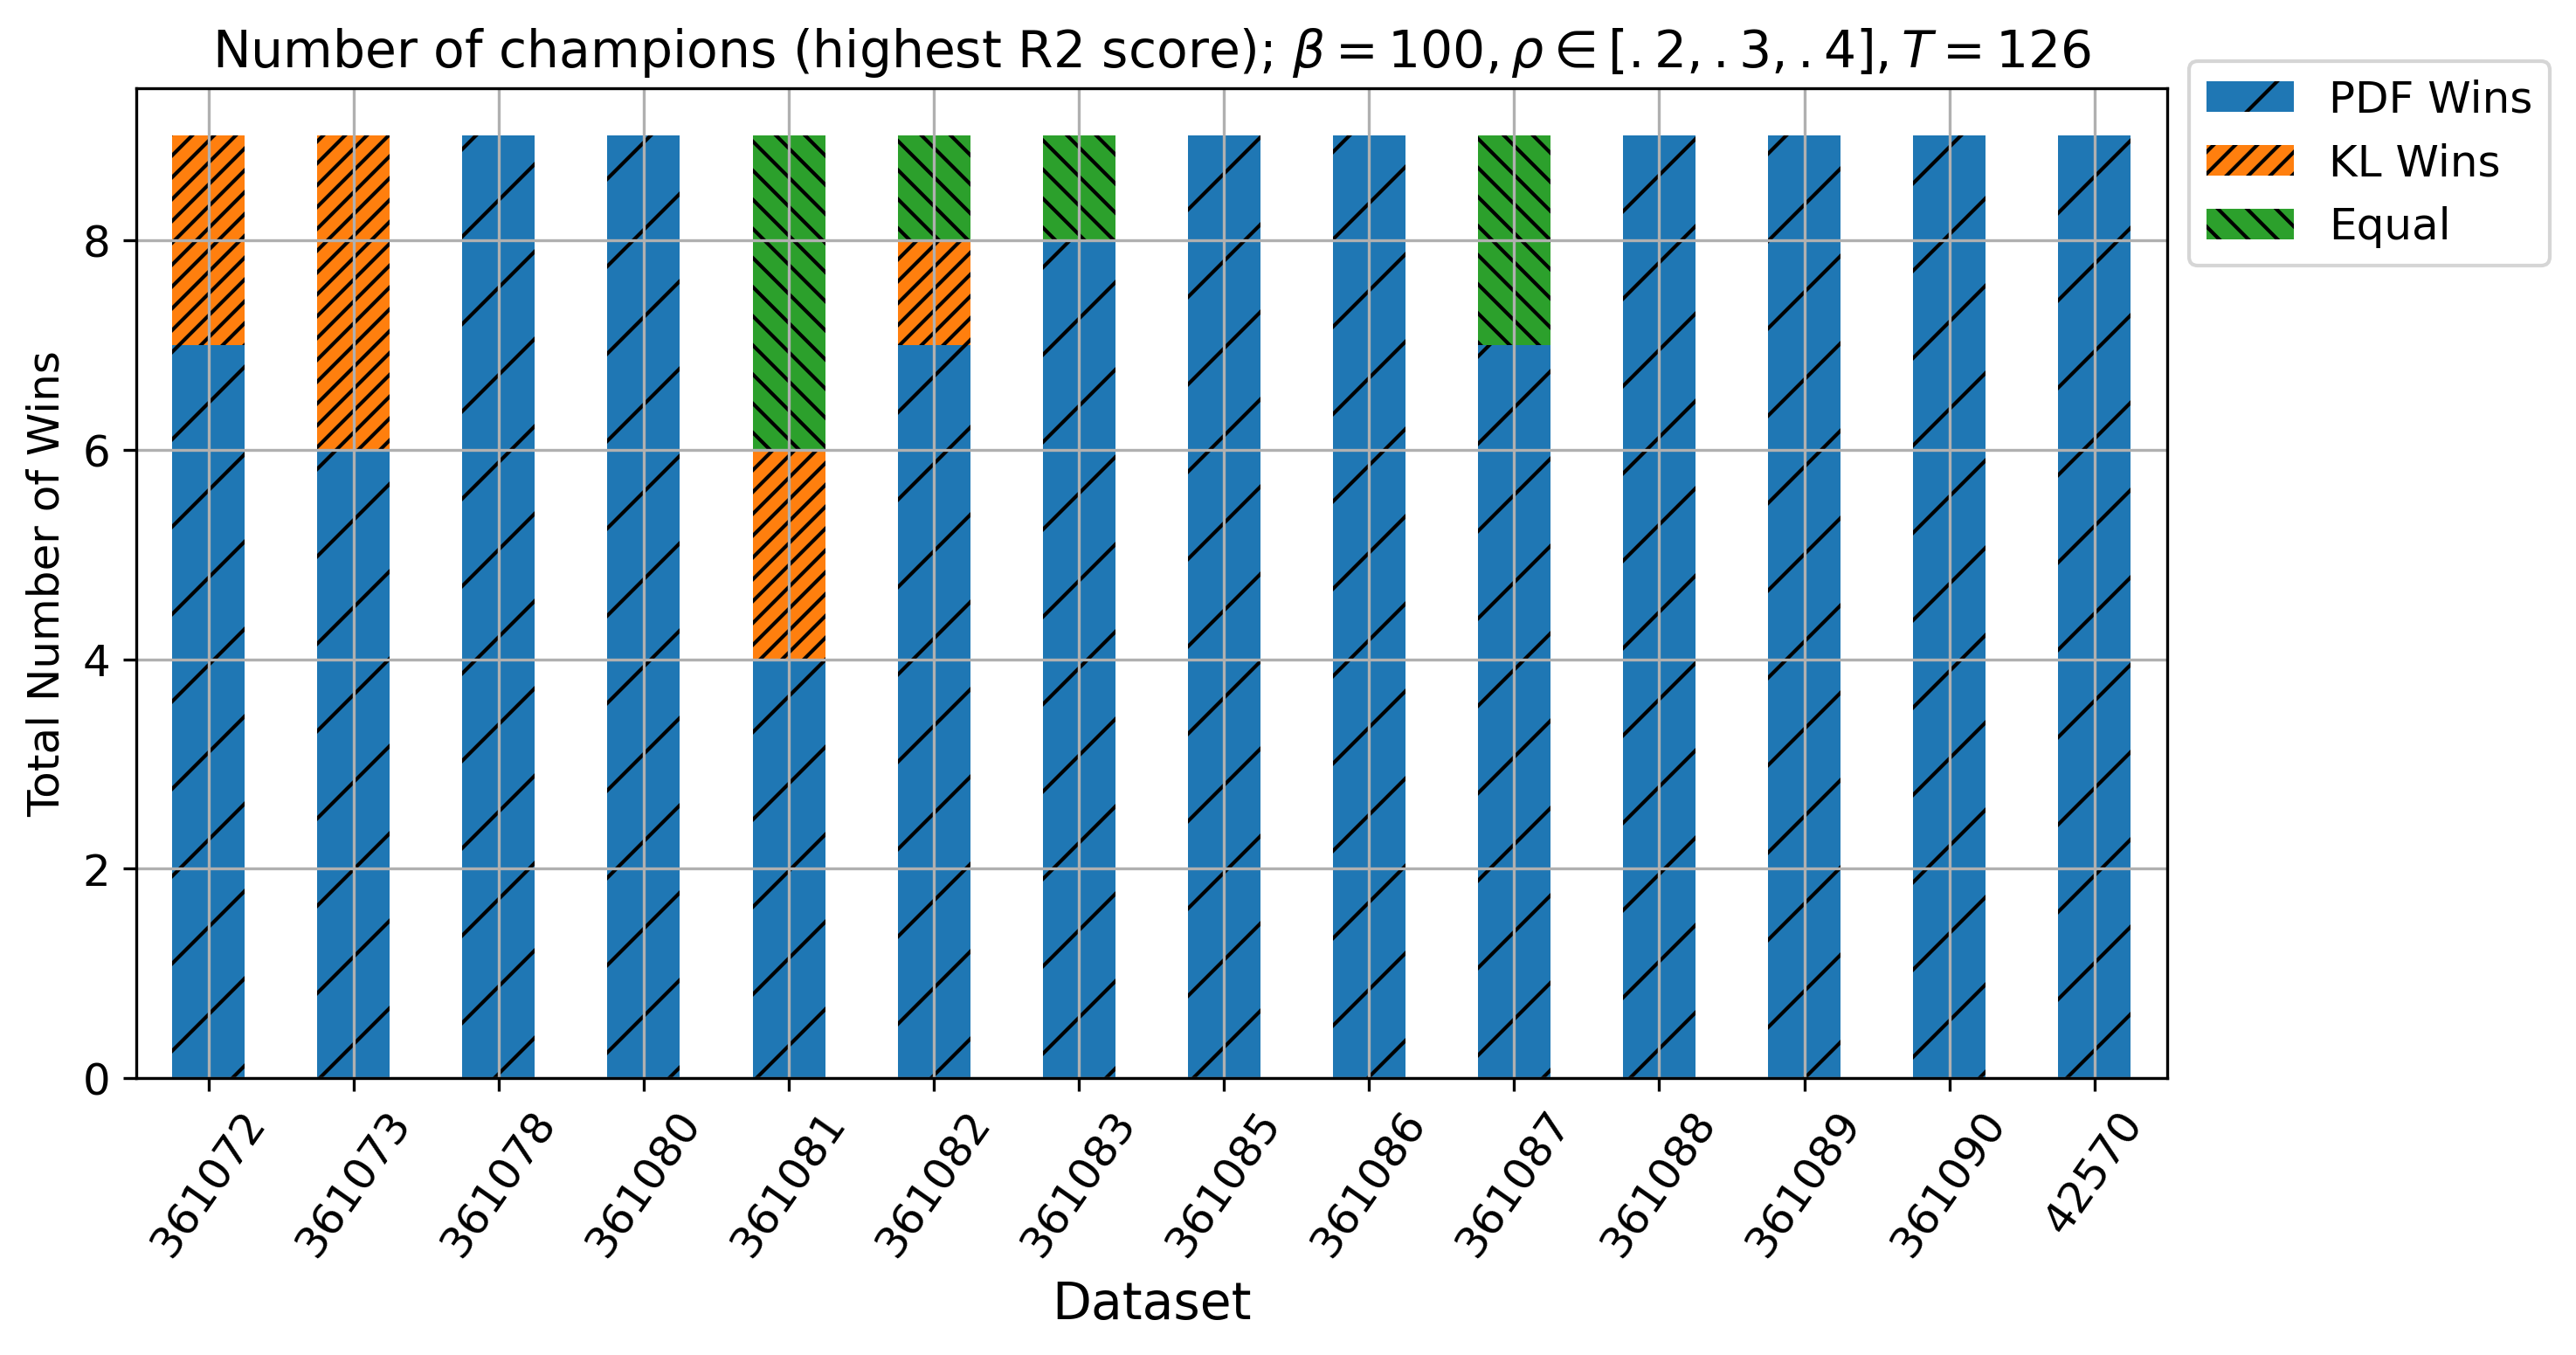

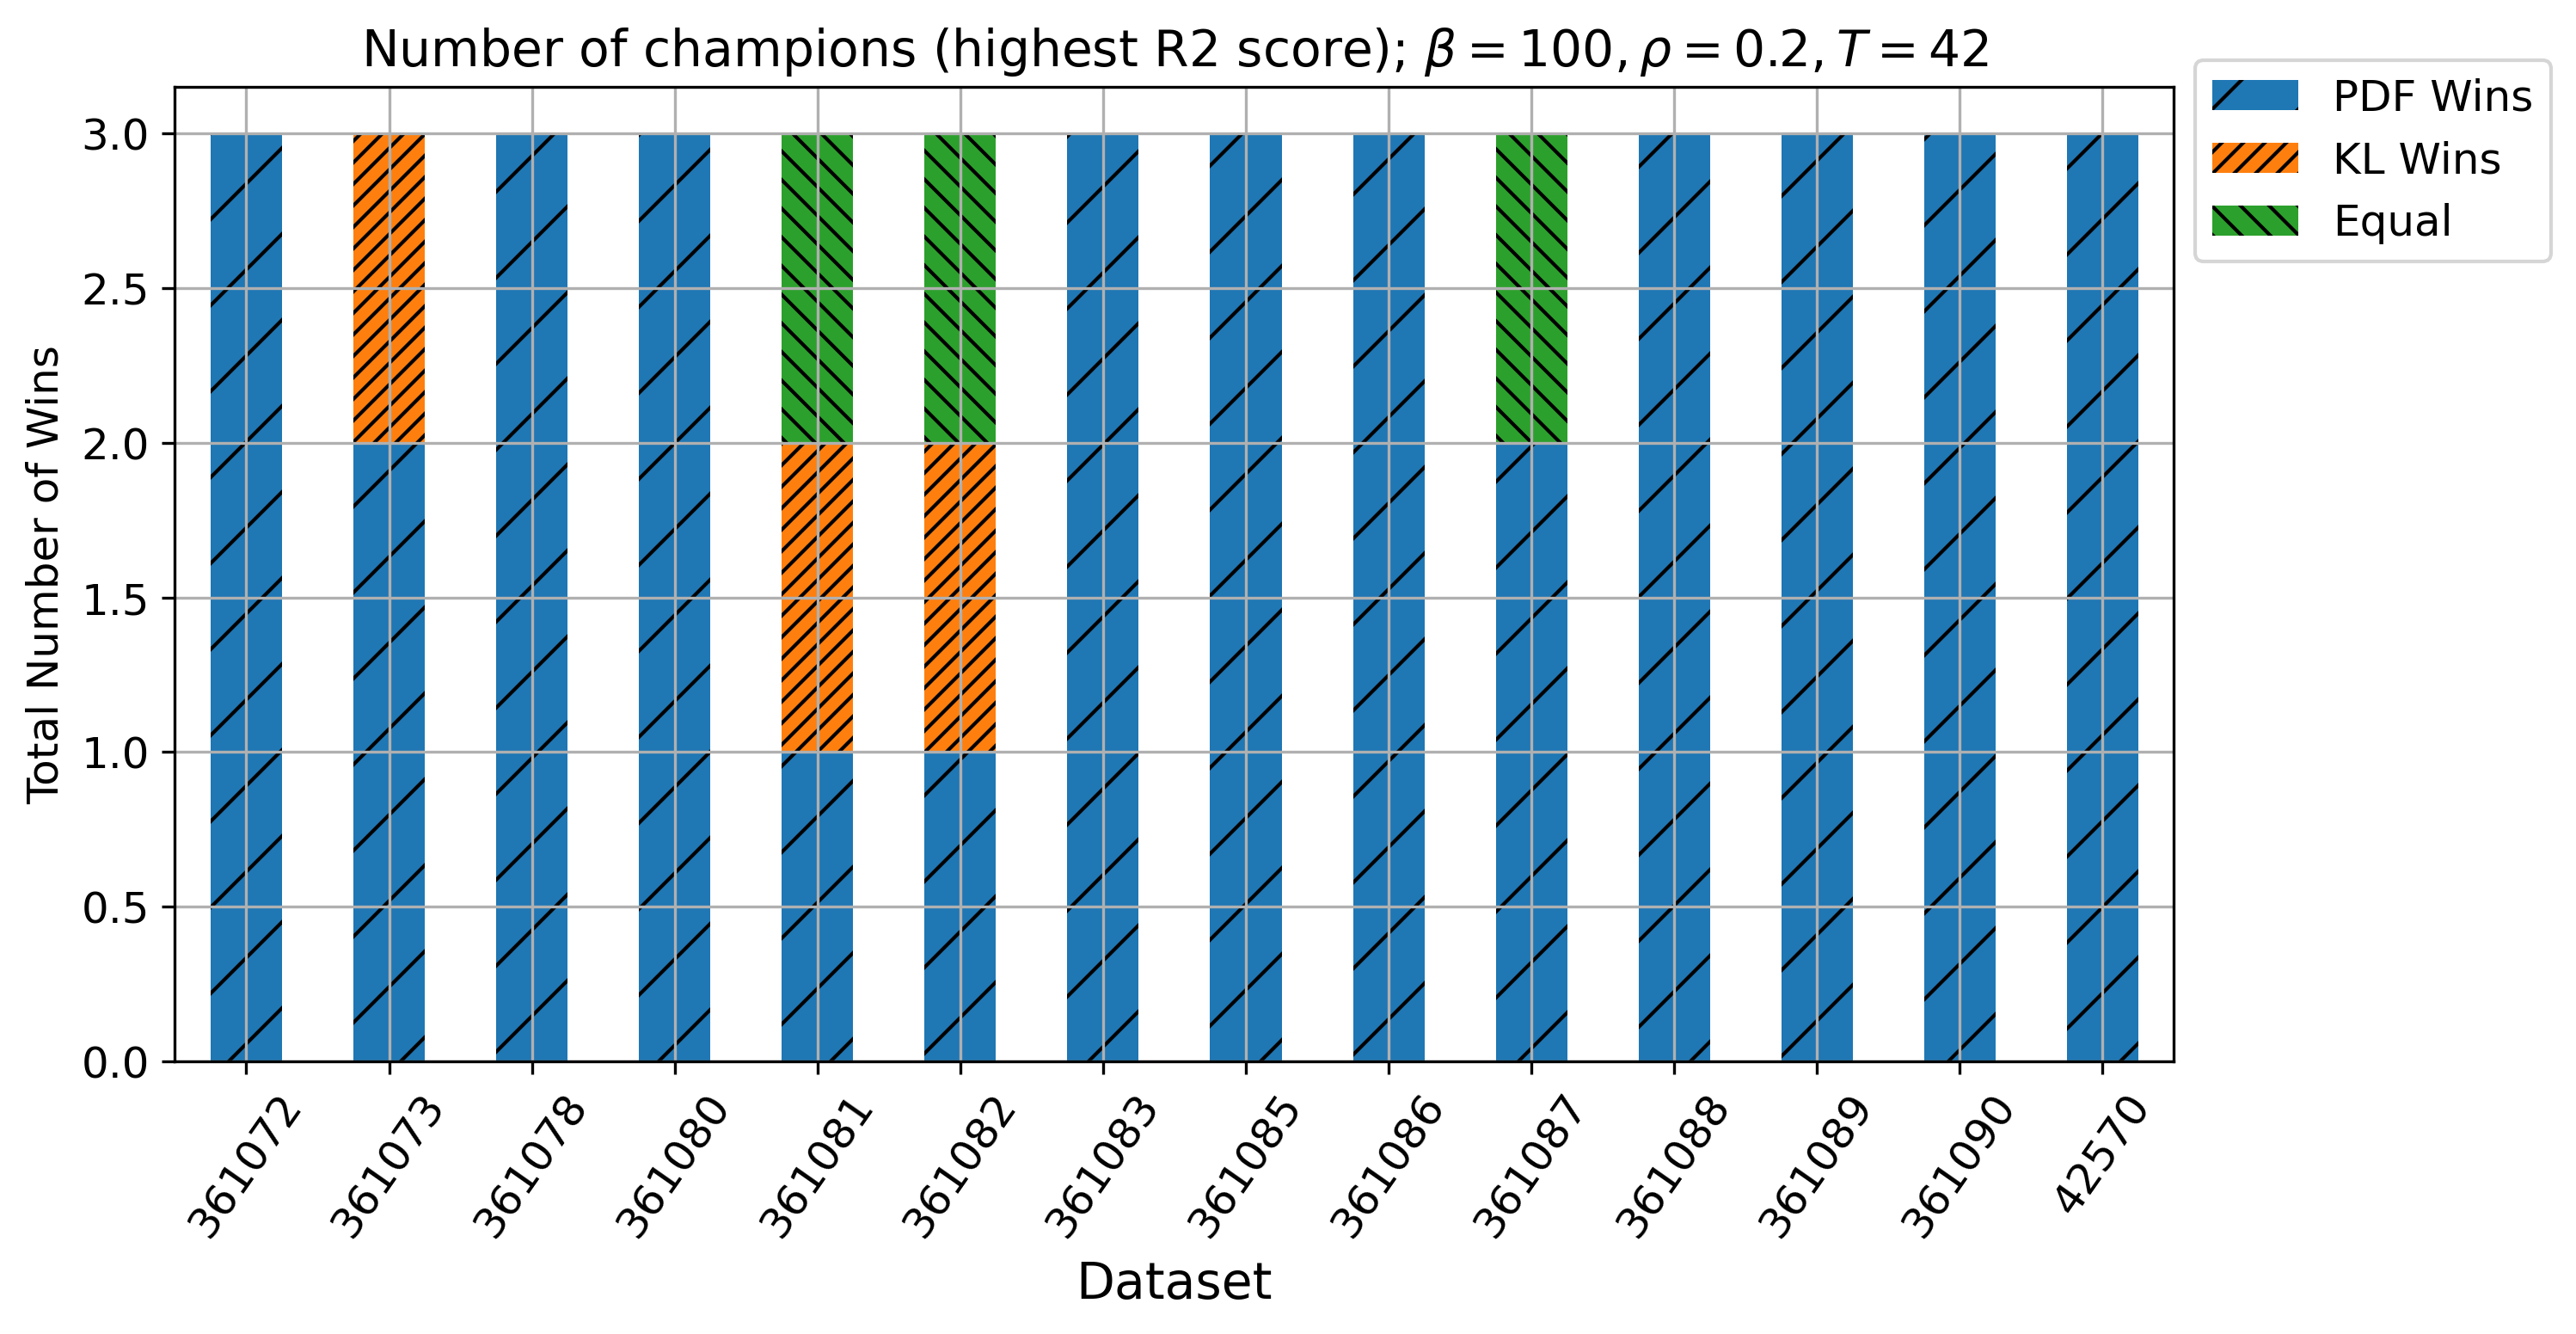

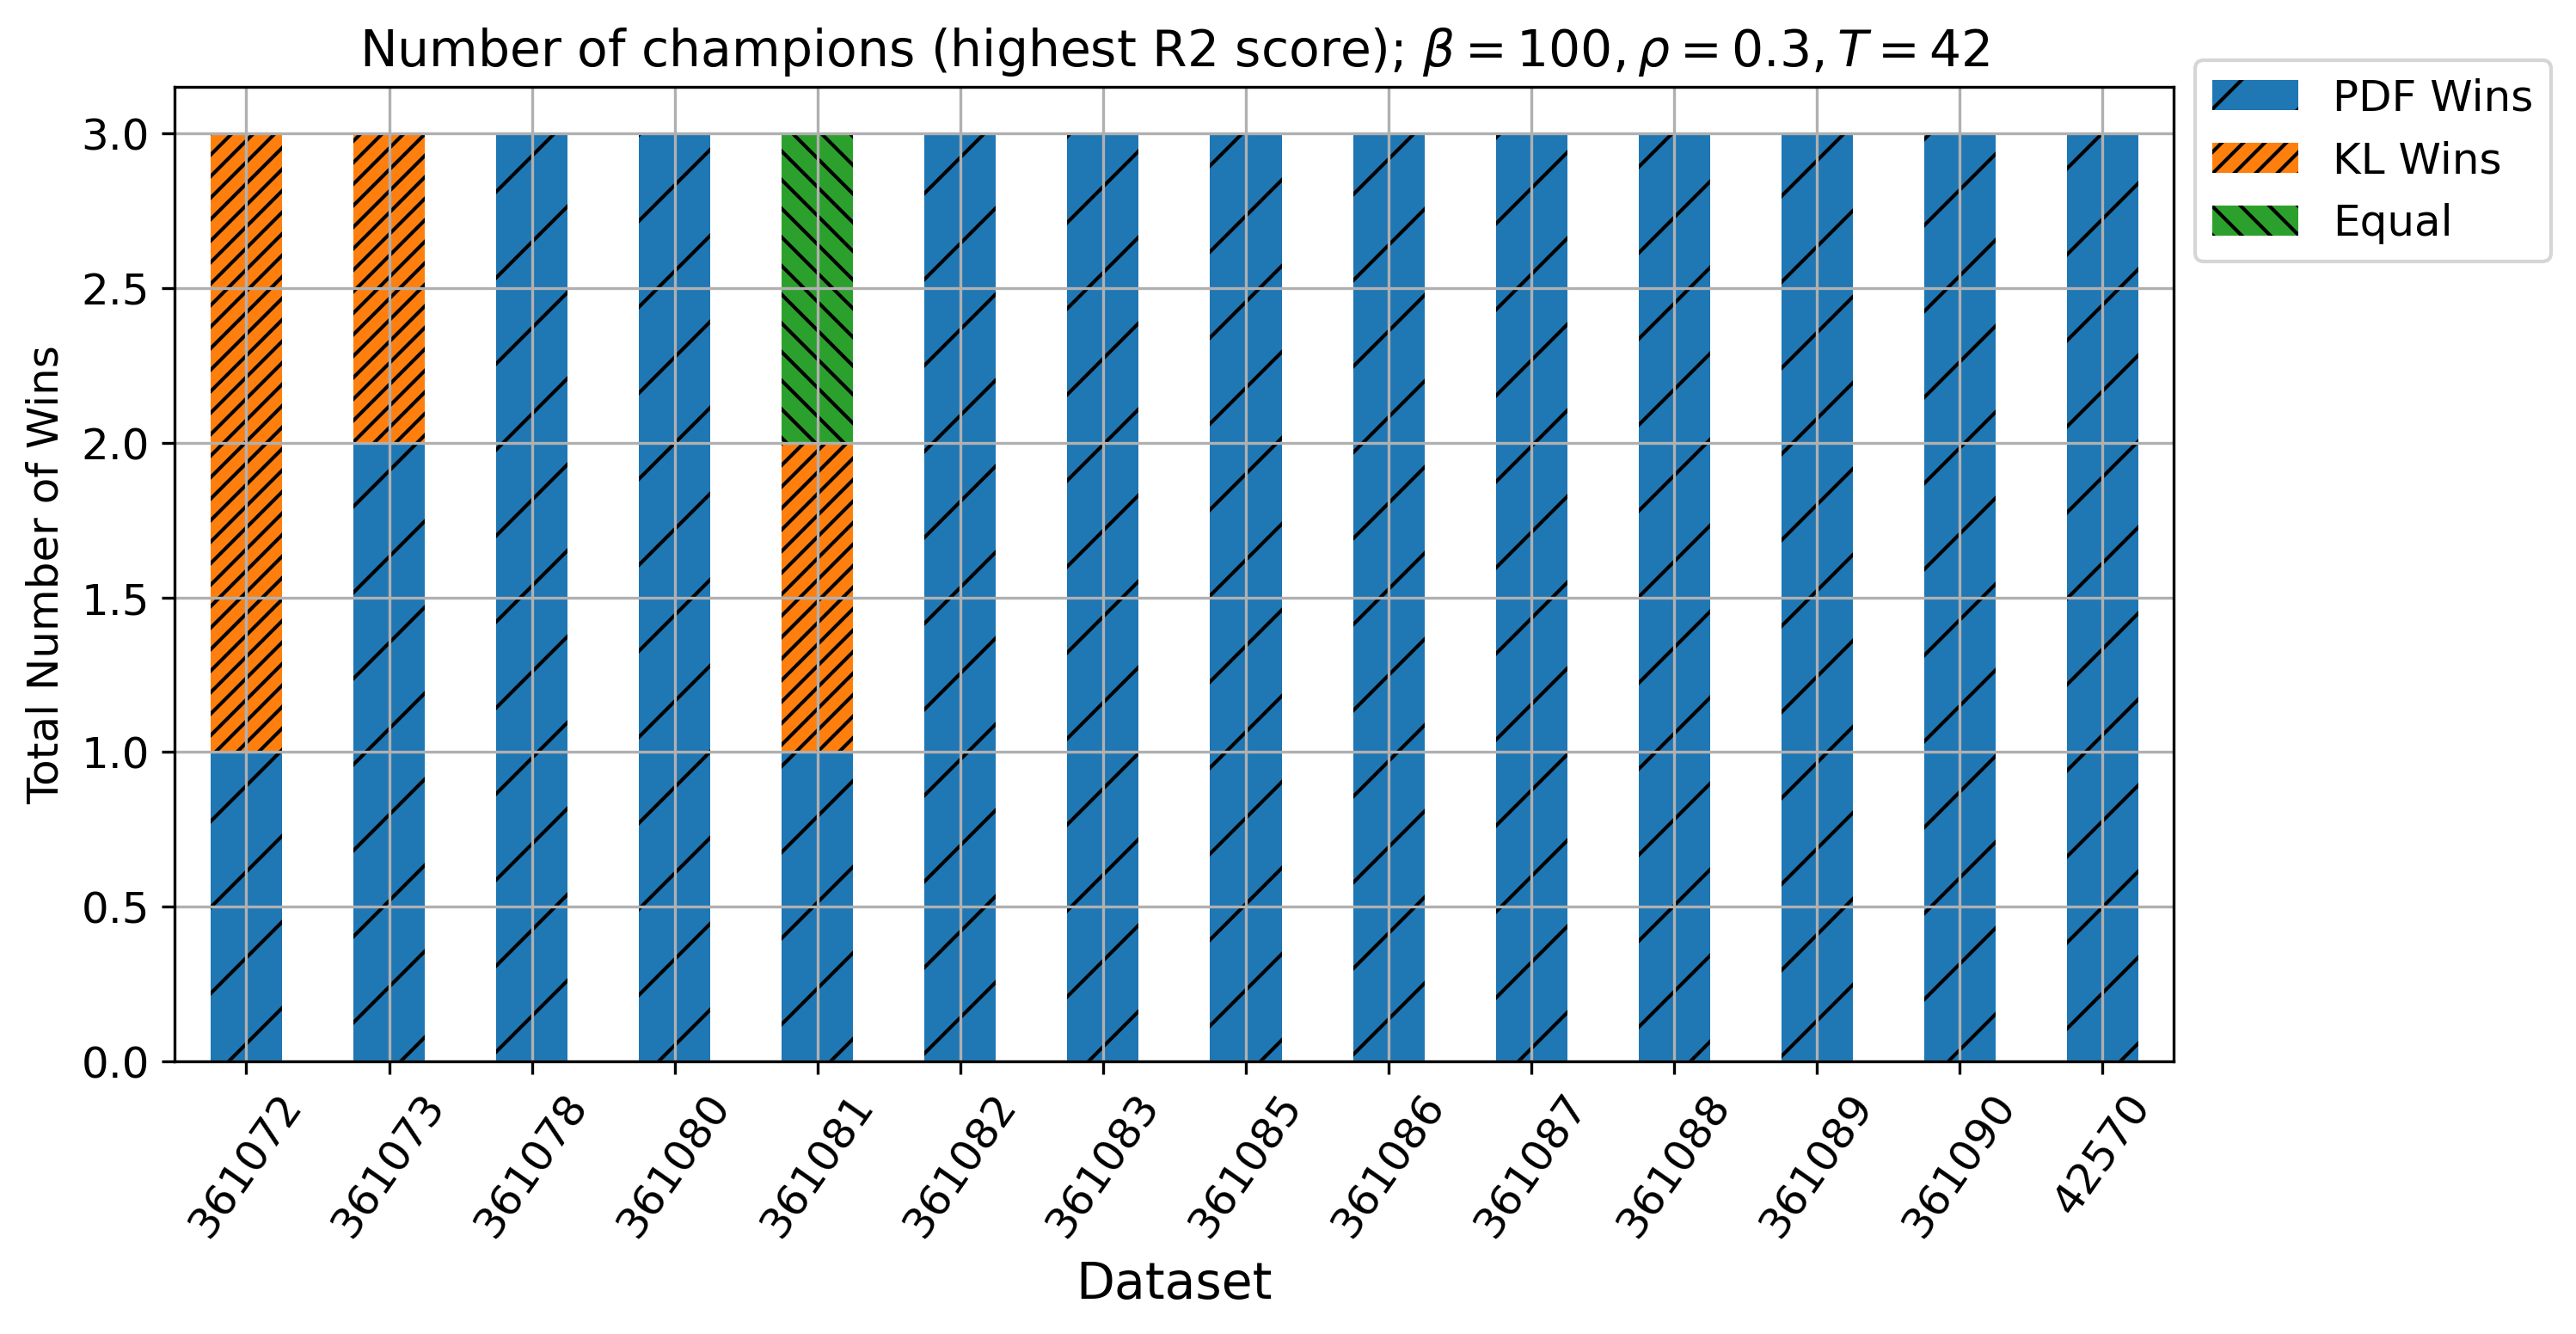

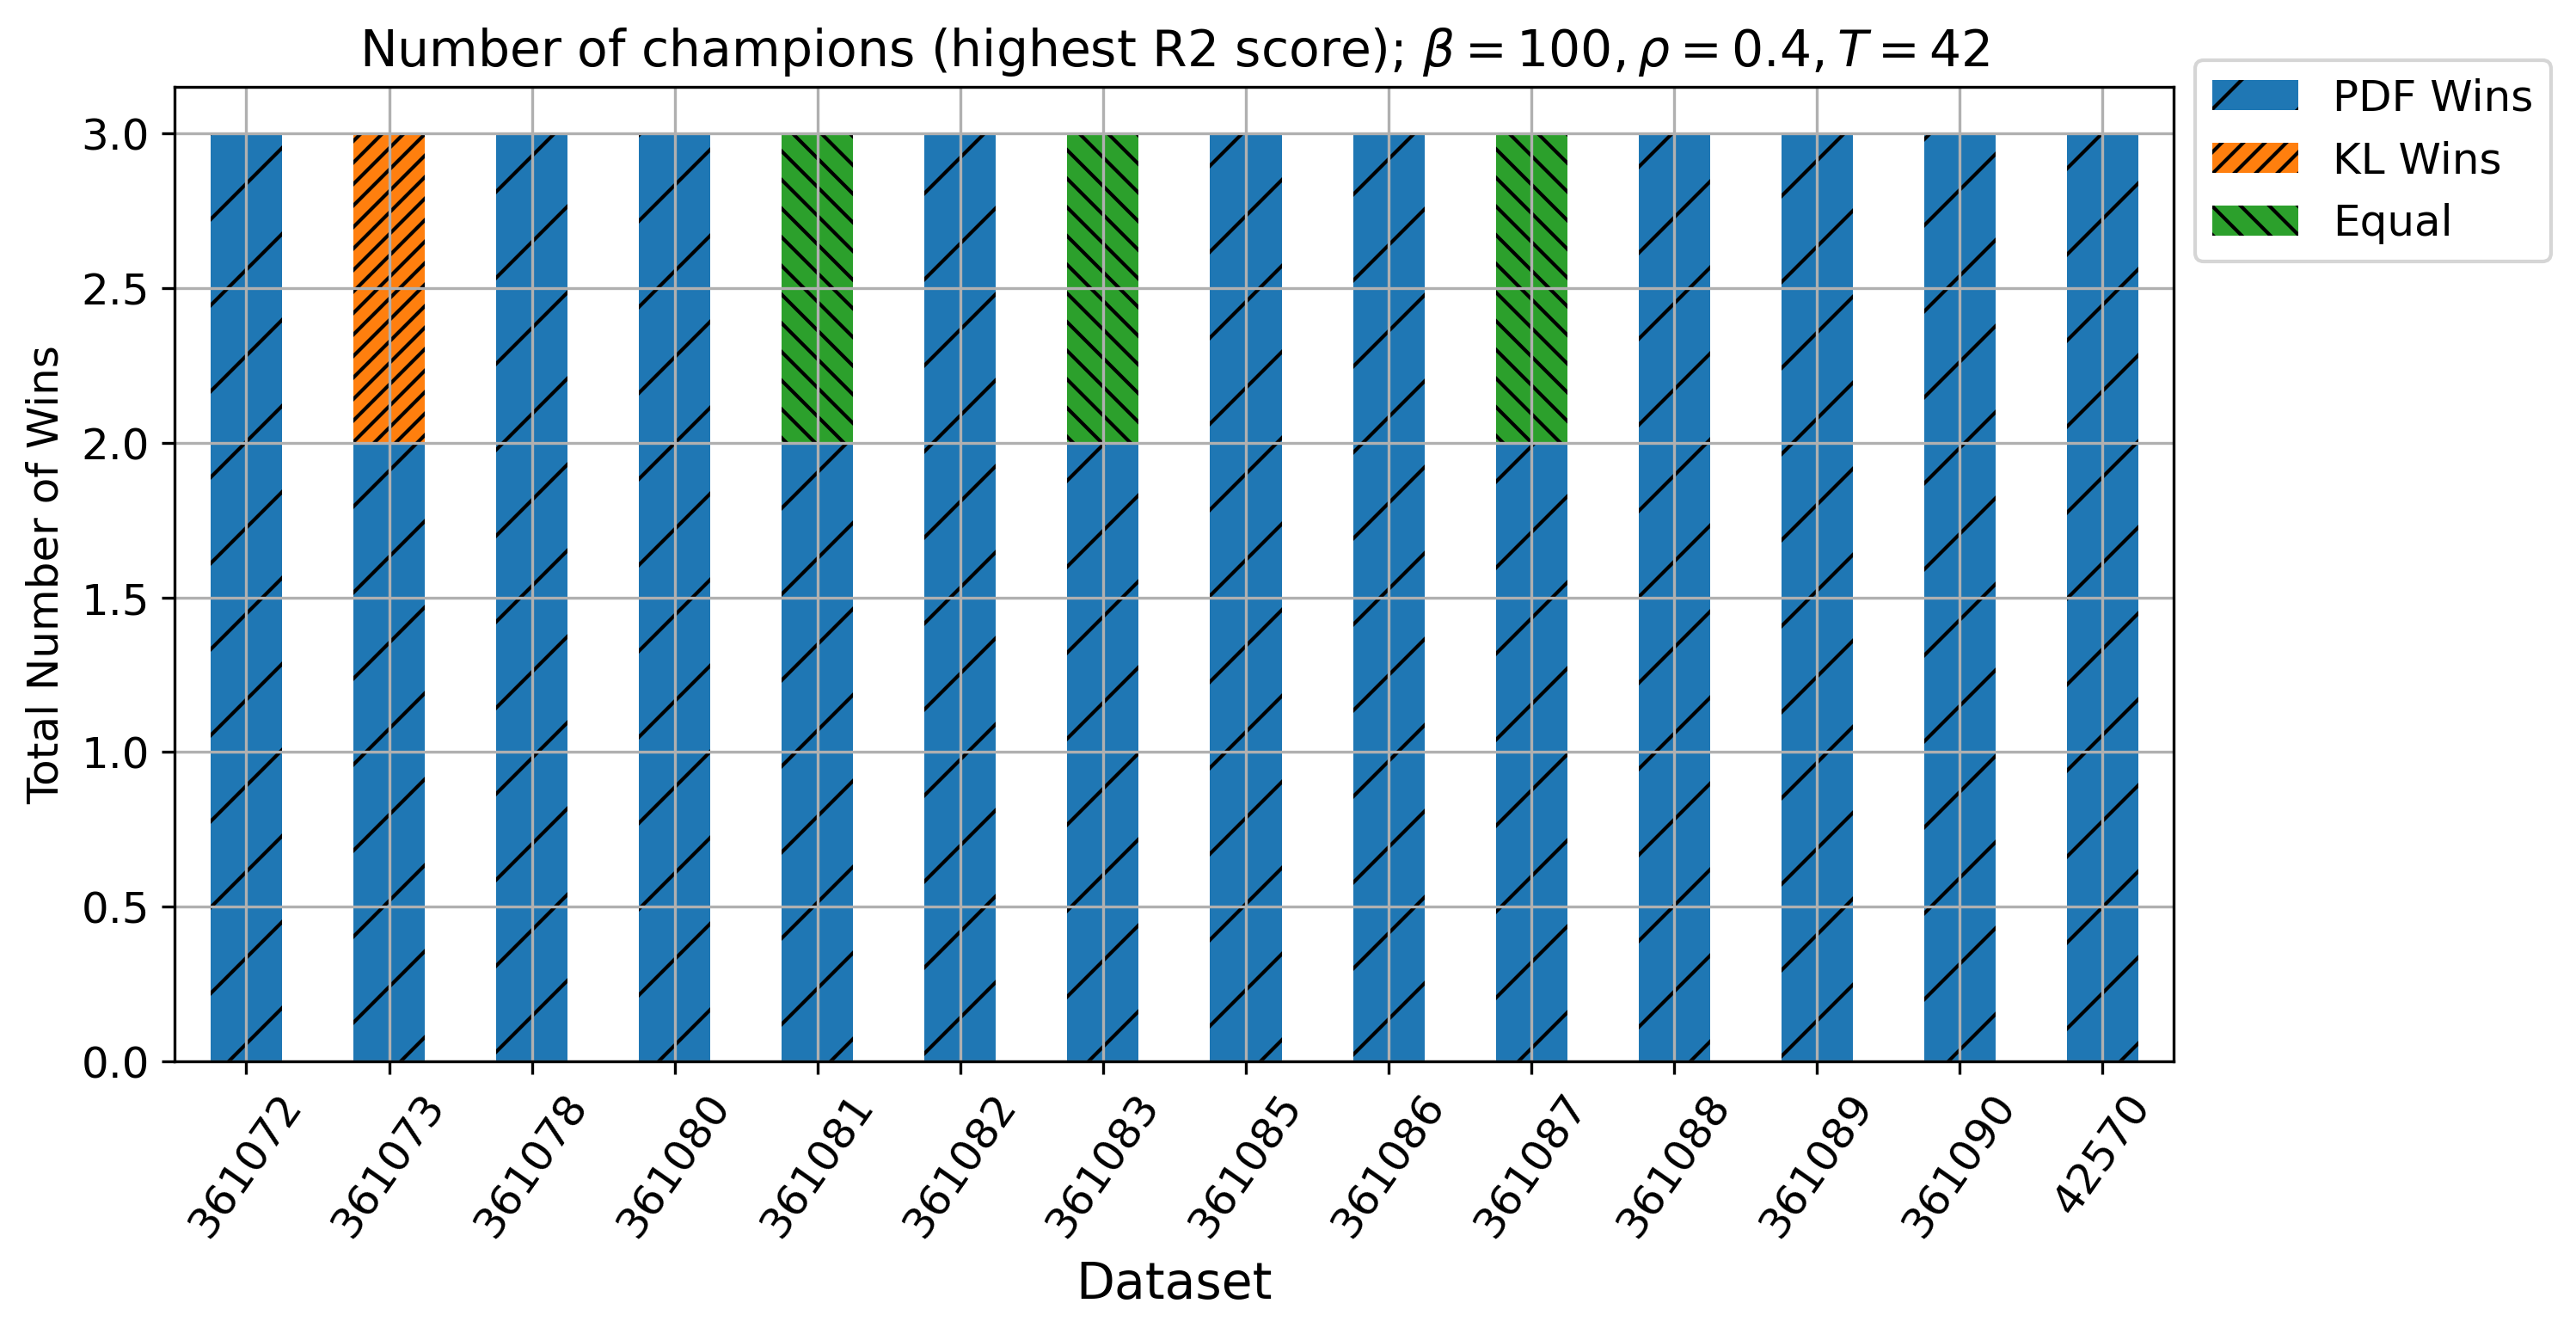

In [1173]:
for r in [None, .2, .3, .4]:
    draw_pdf_vs_KL_stack(df=df11_100, col='R2_100', B=100, ratio=r)

In [1174]:
_sum=pd.DataFrame(df[df.Diff<0].groupby(by=['Dataset']).count()['TS']).sum()
_sum

TS    23
dtype: int64

In [1183]:
_sum=pd.DataFrame(df.groupby(by=['Model_Selector']).count()['TS']).sum()
_sum

TS    126
dtype: int64

In [ ]:
import matplotlib
import matplotlib.pylab as plt
fig = matplotlib.pyplot.gcf()
fig.set_dpi(150)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params)

In [1309]:
def draw_model_stat(df,c='KL_Model',B=100):
    df_model=df.groupby(by=['Dataset',
                       c]).count()['TS'].unstack(c)
    col_rev={'<catboost.core.CatBo':'Catboost',
            'BaggingRegressor()':'BaggingRegressor',
            'DecisionTreeRegresso':'DecisionTreeRegressor',
            'ExtraTreesRegressor':'ExtraTreesRegressor',
            'GradientBoostingRegr':'GradientBoostingRegressor',
            'LGBMRegressor()':'LGBMRegressor',
            'LinearRegression()':'LinearRegression',
            'RandomForestRegresso':'RandomForestRegressor',
            'StackingRegressor(cv':'StackingRegressor(Dynamic)',
            'XGBRegressor(base_sc':'XGBRegressor',
             'ExtraTreesRegressor(':'ExtraTreesRegressor',
             '<catboost.core.':'Catboost',
             'Stacking_SGDRegresso':'StackingSGDRegressor'
            }
    df_model.columns = [col_rev[c] for c in df_model.columns]

    ax=df_model.plot(kind='bar',rot=65,width = .9, stacked=True)
    bars = ax.patches
    patterns =('/', '////', '\\\\\\','/','//','||','o','\\','\\\\')
    hatches = [p for p in patterns for i in range(len(df_n))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)
    plt.xlabel("Dataset", fontsize=14)
    plt.ylabel("Total Number of Wins", fontsize=14)
    _type='KL Model Selection' if 'KL' in c else 'PDF Model Selection'
    ax.set_title(f'{_type} ($T={len(df)}, \\beta={B}$)',fontsize=18)
    plt.grid()
    plt.legend(bbox_to_anchor=(1, .5),fontsize=10)
    ax.set_xlim([0, 10])
    df_model.to_csv(f'paper/df_model_{c}_{B}.jpg')
    plt.savefig(f'paper/df_model_{c}_{B}.jpg', bbox_inches="tight")
    return ax

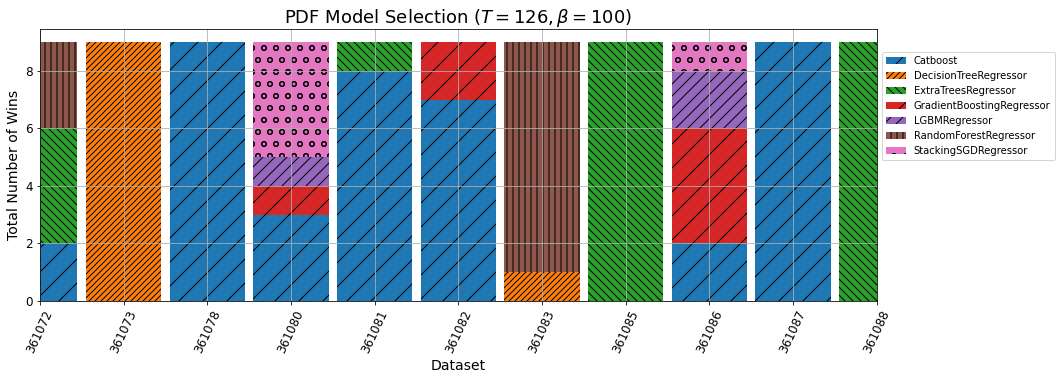

In [1310]:
ax=draw_model_stat(df,c='Model_Selector',B=100)

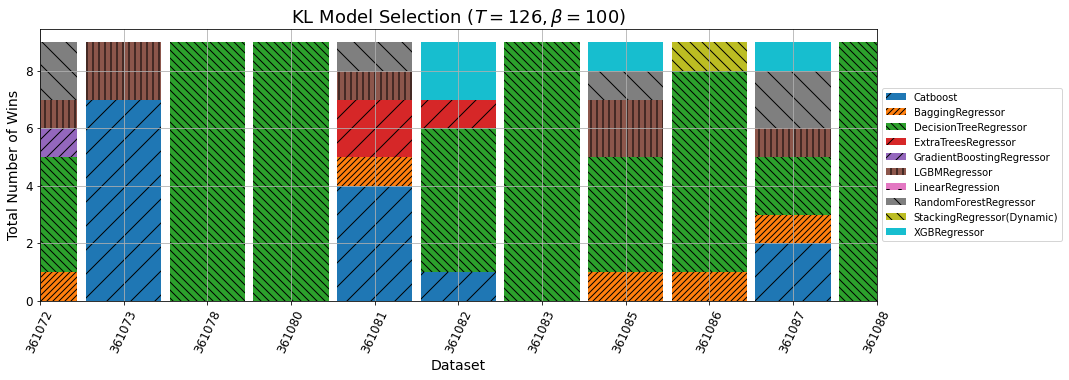

In [1311]:
ax=draw_model_stat(df,c='KL_Model',B=100)